# <center> <img src="figs/logounesp" alt="Logo UNESP" width="110" align="left"/> <font size="20"> <br><center>Mestrado Acadêmico<br/><br><font size="4"> <br><center>Programa de Pós-Graduação em Engenharia Elétrica<br/><br><center>Faculdade de Engenharia de Bauru (FEB)<br/><br><center>Faculdade de Ciências (FC)<br/>

# <center>Método Híbrido Para Solução do Problema de Fluxo de Potência Ótimo Reativo Com Variáveis Discretas<br/>

#### <center><font size="4">Aluno:</center></font><br><center>Rafael Pavan</center></br>

#### <center><font size="4">Orientador:</center></font> <br><center>Profª Drª Edilaine Martins Soler</center></br>

# <center>Implementação Computacional</center>





#### 1. Visualização de Dados do Sistema Elétrico de Potência

    1.1 IEEE 14 Barras;
    1.2 IEEE 30 Barras;
    1.3 IEEE 118 Barras;
    1.4 IEEE 300 Barras;
    
#### 2. Funções Para Manipulação e Extração de Dados do Sistema Elétrico de Potência

    2.1 Função Para Inicalizar o Sistema Elétrico;
    2.2 Função Para Calcular As Condutâncias de Linha do Sistema;
    2.3 Função Para Coletar Tensões Das Barras e Seus Respectivos Limites Inferiores e Superiores;
    2.4 Função Para Coletar Tensões e Potências Das Barras de Geração/Controle de Reativo e Seus Respectivos               Limites Inferiores e Superiores;
    2.5 Função Objetivo Para Calcular as Perdas de Potência Ativa nas Linhas de Transmissão;
    2.6 Função Para Calcular a Penalização por Ultrapassagem de Tensão;
    2.7 Função Para Calcular a Penalização por Ultrapassagem de Geração de Reativo dos Geradores;
    2.8 Função Para Coletar Dados de Carregamento e TAP dos Trafos
    2.9 Função Para Coletar Dados dos Reativos Shunt;
    2.10 Função Para Calcular a Penalização do Bshunt;
    2.11 Função Para Converter TAPs;
    2.12 Função Para Criar Alcateia;
    2.13 Função Para Criar Enxame;
    2.14 Função Para Calcular o Fluxo de Potência;
    2.15 Função Para Calcular o Fitness;
    2.16 Função Para Validação (Salva Dados no SEP);
    
#### 3. Implementação de Métodos de Otimização Meta-Heurísticos
    
    3.1 Método Alcateia de Lobos Cinzentos (Gray Wolf Optimizer);
    3.2 Método Enxame de Partículas (Particle Swarm Optimization);    
    3.3 Em Andamento: Algoritmo Genético, Algoritmo GWO/PSO Híbrido
        .
        .
        .
        .
        .
        
    
#### 4. Protocolo Experimental Com Métodos Meta-Heurísticos

    4.1 Em Andamento
        .
        .
        .
        .
        .
        .
       

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandapower as pp
import time
import random
from pandapower.networks import case14, case_ieee30, case118, case300, case4gs
import pandapower.plotting as pplot
import tabulate
import numba
from numba import njit

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
font = {'size'   : 13}
plt.rc('font', **font)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 


##  1. Visualização dos Dados dos Sistemas Elétricos de Potência


In [2]:
sep14 = case14()
sep30 = case_ieee30()
sep118 = case118()
sep300 = case300()
sep4 = case4gs()

## 1.1 Sistema de 14 Barras

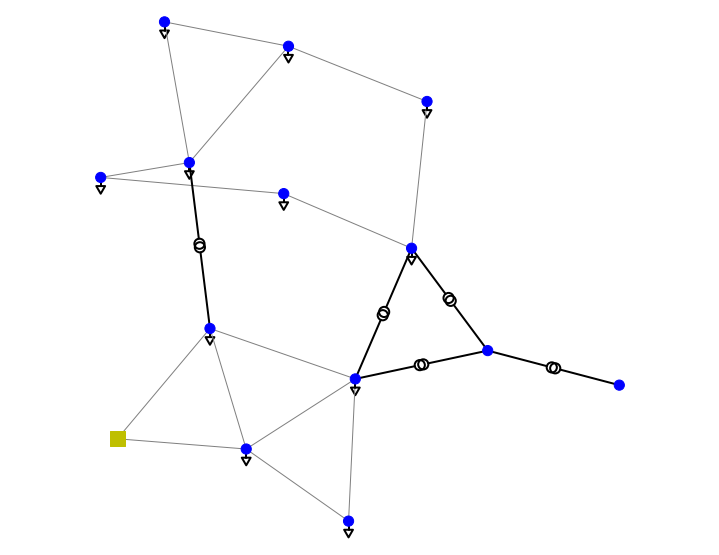

In [3]:
pplot.simple_plot(sep14,plot_loads=True)

In [4]:
pp.runpp(sep14, algorithm = 'nr')
sep14

This pandapower network includes the following parameter tables:
   - bus (14 elements)
   - load (11 elements)
   - gen (4 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (5 elements)
   - poly_cost (5 elements)
   - bus_geodata (14 elements)
 and the following results tables:
   - res_bus (14 elements)
   - res_line (15 elements)
   - res_trafo (5 elements)
   - res_ext_grid (1 element)
   - res_load (11 elements)
   - res_shunt (1 element)
   - res_gen (4 elements)

In [5]:
sep14.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.060000,0.000000,-232.393272,16.549301
1,1.045000,-4.982589,-18.300000,-30.857100
10,1.056907,-14.790622,3.500000,1.800000
11,1.055189,-15.075585,6.100000,1.600000
12,1.050382,-15.156276,13.500000,5.800000
13,1.035530,-16.033645,14.900000,5.000000
2,1.010000,-12.725100,94.200000,-6.075348
3,1.017671,-10.312901,47.800000,-3.900000
4,1.019514,-8.773854,7.600000,1.600000
5,1.070000,-14.220946,11.200000,-5.230944


In [6]:
sep14.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.060000,0.000000,-232.393272,16.549301
1,1.045000,-4.982589,-18.300000,-30.857100
10,1.056907,-14.790622,3.500000,1.800000
11,1.055189,-15.075585,6.100000,1.600000
12,1.050382,-15.156276,13.500000,5.800000
13,1.035530,-16.033645,14.900000,5.000000
2,1.010000,-12.725100,94.200000,-6.075348
3,1.017671,-10.312901,47.800000,-3.900000
4,1.019514,-8.773854,7.600000,1.600000
5,1.070000,-14.220946,11.200000,-5.230944


In [7]:
sep14.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,768.484773,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,3.532005,None,1,ol,10.783732
1,716.088084,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,9.846967,None,4,ol,40.649040
10,0.000000,1.0,8,0.0,True,1.0,27479.652235,100.0,None,1,0.000014,None,9,ol,0.000037
11,0.000000,1.0,8,0.0,True,1.0,27479.652235,100.0,None,1,0.000055,None,13,ol,0.000117
12,0.000000,1.0,9,0.0,True,1.0,27479.652235,100.0,None,1,0.000035,None,10,ol,0.000083
13,0.000000,1.0,11,0.0,True,1.0,27479.652235,100.0,None,1,0.000096,None,12,ol,0.000086
14,0.000000,1.0,12,0.0,True,1.0,27479.652235,100.0,None,1,0.000074,None,13,ol,0.000151
2,637.493051,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,8.563928,None,2,ol,36.080033
3,494.857619,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.590547,None,3,ol,32.134320
4,503.590401,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.379138,None,4,ol,31.689630


In [8]:
sep14.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,0,True,None,0.0,1.06,332.4,0.0,10.0,0.0


In [9]:
sep14.res_ext_grid

,p_mw,q_mvar
0,232.393272,-16.549301


In [10]:
sep14.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,1,True,True,None,40.0,1.0,NaN,None,1.045,False,140.0,0.0,50.0,-40.0
1,2,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,40.0,0.0
2,5,True,True,None,0.0,1.0,NaN,None,1.070,False,100.0,0.0,24.0,-6.0
3,7,True,True,None,0.0,1.0,NaN,None,1.090,False,100.0,0.0,24.0,-6.0


In [11]:
sep14.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,40.0,43.557100,-4.982589,1.045
1,0.0,25.075348,-12.725100,1.010
2,0.0,12.730944,-14.220946,1.070
3,0.0,17.623451,-13.359627,1.090


In [12]:
sep14.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,156.882891,-20.404292,-152.585290,27.676250,4.297600,7.271958,0.638290,0.634645,0.638290,1.060000,0.000000,1.045000,-4.982589,1.507568
1,75.510382,3.854991,-72.747509,2.229359,2.762873,6.084350,0.305050,0.305305,0.305305,1.060000,0.000000,1.019514,-8.773854,0.721097
10,5.227552,4.219138,-5.214678,-4.184937,0.012875,0.034201,17.658967,17.658967,17.658967,1.055932,-14.938521,1.050985,-15.097288,0.064262
11,9.426381,3.610006,-9.310227,-3.362931,0.116154,0.247075,26.534043,26.534043,26.534043,1.055932,-14.938521,1.035530,-16.033645,0.096559
12,-3.785322,-1.615063,3.797904,1.644514,0.012581,0.029451,10.869239,10.869239,10.869239,1.050985,-15.097288,1.056907,-14.790622,0.039554
13,1.614258,0.753959,-1.607960,-0.748261,0.006298,0.005698,4.686717,4.686717,4.686717,1.055189,-15.075585,1.050382,-15.156276,0.017055
14,5.643851,1.747174,-5.589773,-1.637069,0.054078,0.110105,15.612659,15.612659,15.612659,1.050382,-15.156276,1.035530,-16.033645,0.056815
2,73.237579,3.560203,-70.914310,1.602233,2.323269,5.162436,0.300079,0.300351,0.300351,1.045000,-4.982589,1.010000,-12.725100,0.709395
3,56.131496,-1.550350,-54.454838,3.020687,1.676658,1.470337,0.229806,0.229193,0.229806,1.045000,-4.982589,1.017671,-10.312901,0.542776
4,41.516215,1.170998,-40.612462,-2.099034,0.903753,-0.928036,0.169973,0.170589,0.170589,1.045000,-4.982589,1.019514,-8.773854,0.402912


In [13]:
sep14.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,768.484773,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,3.532005,None,1,ol,10.783732
1,716.088084,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,9.846967,None,4,ol,40.649040
10,0.000000,1.0,8,0.0,True,1.0,27479.652235,100.0,None,1,0.000014,None,9,ol,0.000037
11,0.000000,1.0,8,0.0,True,1.0,27479.652235,100.0,None,1,0.000055,None,13,ol,0.000117
12,0.000000,1.0,9,0.0,True,1.0,27479.652235,100.0,None,1,0.000035,None,10,ol,0.000083
13,0.000000,1.0,11,0.0,True,1.0,27479.652235,100.0,None,1,0.000096,None,12,ol,0.000086
14,0.000000,1.0,12,0.0,True,1.0,27479.652235,100.0,None,1,0.000074,None,13,ol,0.000151
2,637.493051,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,8.563928,None,2,ol,36.080033
3,494.857619,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.590547,None,3,ol,32.134320
4,503.590401,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.379138,None,4,ol,31.689630


In [14]:
sep14.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,8,None,-19.0,0.0,0.208,1,1,True


In [15]:
sep14.trafo.columns

Index(['df', 'hv_bus', 'i0_percent', 'in_service', 'lv_bus',
       'max_loading_percent', 'name', 'parallel', 'pfe_kw', 'shift_degree',
       'sn_mva', 'std_type', 'tap_max', 'tap_neutral', 'tap_min',
       'tap_phase_shifter', 'tap_pos', 'tap_side', 'tap_step_degree',
       'tap_step_percent', 'vn_hv_kv', 'vn_lv_kv', 'vk_percent',
       'vkr_percent'],
      dtype='object')

In [16]:
sep14.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,3,0.0,True,6,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,2.2,135.0,14.000,2070.288,0.0
1,1.0,3,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.1,135.0,0.208,5506.182,0.0
2,1.0,4,0.0,True,5,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.8,135.0,0.208,2494.998,0.0
3,1.0,6,0.0,True,7,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,14.0,12.000,1743.885,0.0
4,1.0,6,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,14.0,0.208,1089.099,0.0


## 1.2 Sistema de 30 Barras

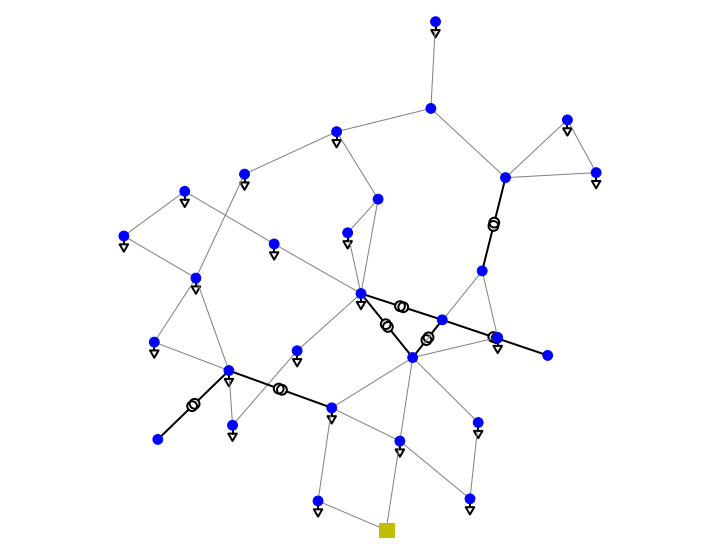

In [17]:
pplot.simple_plot(sep30,plot_loads=True)

In [18]:
pp.runpp(sep30, algorithm = 'nr')
sep30

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (21 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (34 elements)
   - trafo (7 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)
 and the following results tables:
   - res_bus (30 elements)
   - res_line (34 elements)
   - res_trafo (7 elements)
   - res_ext_grid (1 element)
   - res_load (21 elements)
   - res_shunt (2 elements)
   - res_gen (5 elements)

In [19]:
sep30.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,0,b,132.0,1
1,True,1.06,0.94,1,b,132.0,1
10,True,1.06,0.94,10,b,11.0,1
11,True,1.06,0.94,11,b,33.0,1
12,True,1.06,0.94,12,b,11.0,1
13,True,1.06,0.94,13,b,33.0,1
14,True,1.06,0.94,14,b,33.0,1
15,True,1.06,0.94,15,b,33.0,1
16,True,1.06,0.94,16,b,33.0,1
17,True,1.06,0.94,17,b,33.0,1


In [20]:
sep30.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.060000,0.000000,-260.956948,20.417883
1,1.045000,-5.378243,-18.300000,-43.369462
10,1.082000,-14.097969,0.000000,-16.057446
11,1.057339,-14.932908,11.200000,7.500000
12,1.071000,-14.932908,0.000000,-10.450719
13,1.042508,-15.824522,6.200000,1.600000
14,1.037916,-15.916363,8.200000,2.500000
15,1.044626,-15.515424,3.500000,1.800000
16,1.040150,-15.849948,9.000000,5.800000
17,1.028396,-16.530189,3.200000,0.900000


In [21]:
sep30.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,40.0,56.069462,-5.378243,1.045
1,0.0,35.658791,-14.148767,1.010
2,0.0,36.111267,-11.797385,1.010
3,0.0,16.057446,-14.097969,1.082
4,0.0,10.450719,-14.932908,1.071


In [22]:
sep30.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,1,True,True,None,40.0,1.0,NaN,None,1.045,False,140.0,0.0,40.0,-50.0
1,4,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,40.0,-40.0
2,7,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,10.0,-40.0
3,10,True,True,None,0.0,1.0,NaN,None,1.082,False,100.0,0.0,6.0,-24.0
4,12,True,True,None,0.0,1.0,NaN,None,1.071,False,100.0,0.0,6.0,-24.0


In [23]:
sep30.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,803.812844,1.0,0,0.0,True,1.0,99999.0,100.0,None,1,3.345408,None,1,ol,10.018800
1,621.128107,1.0,0,0.0,True,1.0,99999.0,100.0,None,1,7.875648,None,2,ol,28.784448
10,0.000000,1.0,11,0.0,True,1.0,99999.0,100.0,None,1,1.340559,None,13,ol,2.786751
11,0.000000,1.0,11,0.0,True,1.0,99999.0,100.0,None,1,0.720918,None,14,ol,1.420056
12,0.000000,1.0,11,0.0,True,1.0,99999.0,100.0,None,1,1.029105,None,15,ol,2.163843
13,0.000000,1.0,13,0.0,True,1.0,99999.0,100.0,None,1,2.406690,None,14,ol,2.174733
14,0.000000,1.0,15,0.0,True,1.0,99999.0,100.0,None,1,0.570636,None,16,ol,2.094147
15,0.000000,1.0,14,0.0,True,1.0,99999.0,100.0,None,1,1.168497,None,17,ol,2.379465
16,0.000000,1.0,17,0.0,True,1.0,99999.0,100.0,None,1,0.695871,None,18,ol,1.406988
17,0.000000,1.0,18,0.0,True,1.0,99999.0,100.0,None,1,0.370260,None,19,ol,0.740520


In [24]:
sep30.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,1,True,True,None,40.0,1.0,NaN,None,1.045,False,140.0,0.0,40.0,-50.0
1,4,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,40.0,-40.0
2,7,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,10.0,-40.0
3,10,True,True,None,0.0,1.0,NaN,None,1.082,False,100.0,0.0,6.0,-24.0
4,12,True,True,None,0.0,1.0,NaN,None,1.071,False,100.0,0.0,6.0,-24.0


In [25]:
sep30.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,9,None,-19.0,0.0,33.0,1,1,True
1,23,None,-4.3,0.0,33.0,1,1,True


In [26]:
sep30.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,5,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,2.2,132.0,1.0,20.799792,0.0
1,1.0,5,0.0,True,9,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.1,132.0,33.0,55.599444,0.0
2,1.0,10,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,11.0,1.0,20.799792,0.0
3,1.0,9,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,33.0,1.0,10.999890,0.0
4,1.0,3,0.0,True,11,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.8,132.0,33.0,25.599744,0.0
5,1.0,11,0.0,True,12,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,33.0,11.0,13.999860,0.0
6,1.0,27,0.0,True,26,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.2,132.0,33.0,39.599604,0.0


In [27]:
sep30.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,2.772124e+01,-8.092986,-2.772124e+01,9.717440,-7.105427e-15,1.624454,0.124982,16.134721,1.010626,-11.055023,1.051132,-14.097969,28.575087
1,1.583966e+01,0.186541,-1.583966e+01,1.096066,1.776357e-15,1.282607,0.068557,0.265726,1.010626,-11.055023,1.045379,-15.688173,15.674365
2,-6.661338e-15,16.057446,6.661338e-15,-15.599344,0.000000e+00,0.458102,0.778925,8.568180,1.082000,-14.097969,1.051132,-14.097969,14.840672
3,-2.772124e+01,-5.082386,2.772124e+01,5.881905,-3.552714e-15,0.799519,0.471676,15.565294,1.045379,-15.688173,1.051132,-14.097969,26.960150
4,4.419322e+01,14.410000,-4.419322e+01,-9.721377,1.421085e-14,4.688622,0.200841,0.748735,1.012300,-9.279432,1.057339,-14.932908,45.918856
5,1.065814e-13,-10.317415,-1.070255e-13,10.450719,-4.440892e-16,0.133303,0.170719,0.512157,1.057339,-14.932908,1.071000,-14.932908,9.758005
6,1.806888e+01,5.036015,-1.806888e+01,-3.748796,1.065814e-14,1.287219,0.081465,0.315431,1.007101,-11.677297,1.023539,-15.530080,18.625485


## 1.3 Sistema de 118 Barras

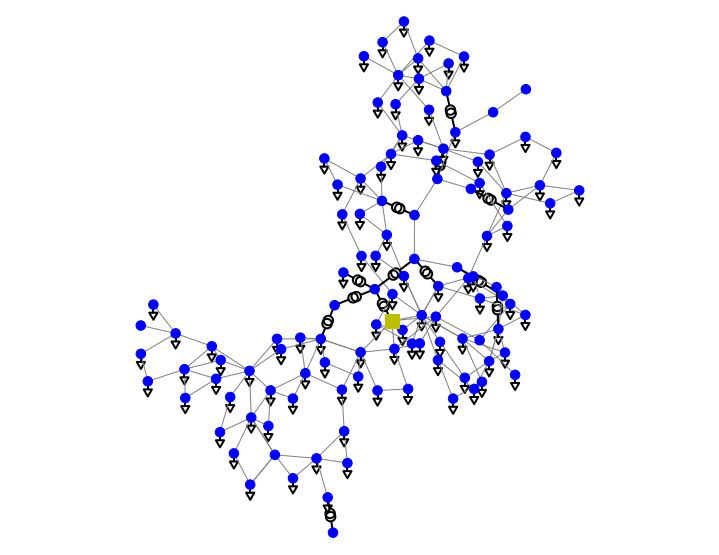

In [28]:
pplot.simple_plot(sep118,plot_loads=True)

In [29]:
pp.runpp(sep118, algorithm = 'nr')

sep118

This pandapower network includes the following parameter tables:
   - bus (118 elements)
   - load (99 elements)
   - gen (53 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (173 elements)
   - trafo (13 elements)
   - poly_cost (54 elements)
   - bus_geodata (118 elements)
 and the following results tables:
   - res_bus (118 elements)
   - res_line (173 elements)
   - res_trafo (13 elements)
   - res_ext_grid (1 element)
   - res_load (99 elements)
   - res_shunt (14 elements)
   - res_gen (53 elements)

In [30]:
sep118.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,138.0,1
1,True,1.06,0.94,2,b,138.0,1
10,True,1.06,0.94,11,b,138.0,1
100,True,1.06,0.94,101,b,138.0,1
101,True,1.06,0.94,102,b,138.0,1
...,...,...,...,...,...,...,...
95,True,1.06,0.94,96,b,138.0,1
96,True,1.06,0.94,97,b,138.0,1
97,True,1.06,0.94,98,b,138.0,1
98,True,1.06,0.94,99,b,138.0,1


In [31]:
sep118.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,0.955000,10.972367,51.0,30.104097
1,0.971393,11.512175,20.0,9.000000
10,0.985089,13.005428,70.0,23.000000
100,0.991420,29.645192,22.0,15.000000
101,0.989131,32.363302,5.0,3.000000
...,...,...,...,...
95,0.992283,27.540933,38.0,15.000000
96,1.011166,27.914135,15.0,9.000000
97,1.023509,27.431610,34.0,8.000000
98,1.010000,27.065051,42.0,17.535596


In [32]:
sep118.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,0,True,True,None,0.0,1.0,NaN,None,0.955,False,100.0,0.0,15.0,-5.0
1,3,True,True,None,0.0,1.0,NaN,None,0.998,False,100.0,0.0,300.0,-300.0
10,24,True,True,None,220.0,1.0,NaN,None,1.050,False,320.0,0.0,140.0,-47.0
11,25,True,True,None,314.0,1.0,NaN,None,1.015,False,414.0,0.0,1000.0,-1000.0
12,26,True,True,None,0.0,1.0,NaN,None,0.968,False,100.0,0.0,300.0,-300.0
13,30,True,True,None,7.0,1.0,NaN,None,0.967,False,107.0,0.0,300.0,-300.0
14,31,True,True,None,0.0,1.0,NaN,None,0.963,False,100.0,0.0,42.0,-14.0
15,33,True,True,None,0.0,1.0,NaN,None,0.984,False,100.0,0.0,24.0,-8.0
16,35,True,True,None,0.0,1.0,NaN,None,0.980,False,100.0,0.0,24.0,-8.0
17,39,True,True,None,0.0,1.0,NaN,None,0.970,False,100.0,0.0,300.0,-300.0


In [33]:
sep118.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,353.789081,1.0,0,0.0,True,1.0,41.418606,100.0,None,1,5.770332,None,1,ol,19.024956
1,150.708577,1.0,0,0.0,True,1.0,41.418606,100.0,None,1,2.456676,None,2,ol,8.074656
10,69.922094,1.0,10,0.0,True,1.0,41.418606,100.0,None,1,1.133118,None,11,ol,3.732624
100,122.294021,1.0,69,0.0,True,1.0,41.418606,100.0,None,1,1.679681,None,70,ol,6.760620
101,679.720754,1.0,23,0.0,True,1.0,41.418606,100.0,None,1,9.293472,None,71,ol,37.326240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,373.567841,1.0,65,0.0,True,1.0,41.418606,100.0,None,1,4.265856,None,66,ol,19.329660
96,987.823686,1.0,46,0.0,True,1.0,41.418606,100.0,None,1,16.073136,None,68,ol,52.904232
97,1153.296689,1.0,48,0.0,True,1.0,41.418606,100.0,None,1,18.758340,None,68,ol,61.702560
98,1699.301885,1.0,68,0.0,True,1.0,41.418606,100.0,None,1,5.713200,None,69,ol,24.185880


In [34]:
sep118.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,4,None,40.0,0.0,138.0,1,1,True
1,33,None,-14.0,0.0,138.0,1,1,True
10,82,None,-10.0,0.0,138.0,1,1,True
11,104,None,-20.0,0.0,138.0,1,1,True
12,106,None,-6.0,0.0,138.0,1,1,True
13,109,None,-6.0,0.0,138.0,1,1,True
2,36,None,25.0,0.0,138.0,1,1,True
3,43,None,-10.0,0.0,138.0,1,1,True
4,44,None,-10.0,0.0,138.0,1,1,True
5,45,None,-10.0,0.0,138.0,1,1,True


In [35]:
sep118.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,7,0.000000,True,4,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,1.5,345.0,138.0,264.330000,0.000
1,1.0,25,0.000000,True,24,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,4.0,345.0,138.0,378.180000,0.000
10,1.0,80,0.000000,True,79,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.5,345.0,138.0,366.300000,0.000
11,1.0,86,-0.044949,True,85,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,161.0,138.0,2072.259865,279.972
12,1.0,115,-0.165657,True,67,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,345.0,161.0,40.236041,3.366
2,1.0,29,0.000000,True,16,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,4.0,345.0,138.0,384.120000,0.000
3,1.0,37,0.000000,True,36,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.5,345.0,138.0,371.250000,0.000
4,1.0,62,0.000000,True,58,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,4.0,345.0,138.0,382.140000,0.000
5,1.0,63,0.000000,True,60,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,1.5,345.0,138.0,265.320000,0.000
6,1.0,64,0.000000,True,65,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.5,345.0,138.0,366.300000,0.000


## 1.4 Sistema de 300 Barras

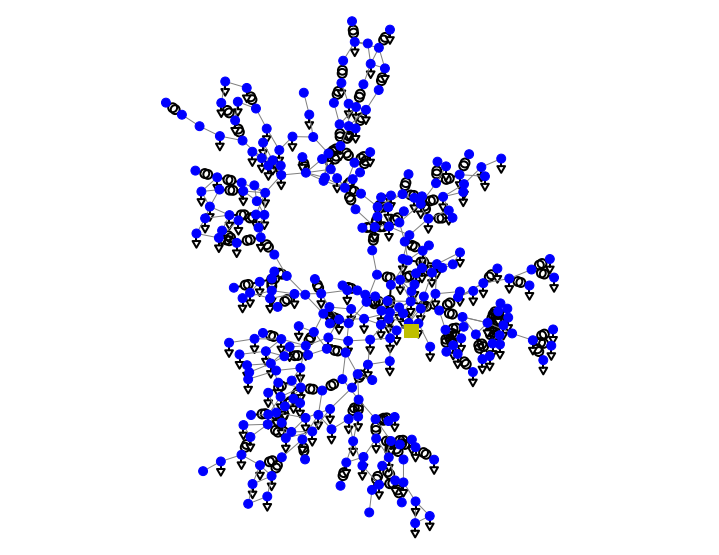

In [36]:
pplot.simple_plot(sep300,plot_loads=True)

In [37]:
pp.runpp(sep300, algorithm = 'nr')
sep300

This pandapower network includes the following parameter tables:
   - bus (300 elements)
   - load (193 elements)
   - sgen (8 elements)
   - gen (68 elements)
   - shunt (29 elements)
   - ext_grid (1 element)
   - line (283 elements)
   - trafo (128 elements)
   - poly_cost (69 elements)
   - bus_geodata (300 elements)
 and the following results tables:
   - res_bus (300 elements)
   - res_line (283 elements)
   - res_trafo (128 elements)
   - res_ext_grid (1 element)
   - res_load (193 elements)
   - res_sgen (8 elements)
   - res_shunt (29 elements)
   - res_gen (68 elements)

In [38]:
sep300.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,115.0,1
1,True,1.06,0.94,2,b,115.0,1
10,True,1.06,0.94,11,b,115.0,1
100,True,1.06,0.94,122,b,115.0,1
101,True,1.06,0.94,123,b,115.0,1
...,...,...,...,...,...,...,...
95,True,1.06,0.94,117,b,115.0,1
96,True,1.06,0.94,118,b,115.0,1
97,True,1.06,0.94,119,b,115.0,1
98,True,1.06,0.94,120,b,115.0,1


In [39]:
sep300.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.028422,5.970424,90.0,49.000000
1,1.035342,7.758020,56.0,15.000000
10,1.005658,2.484330,83.0,21.000000
100,0.972870,-14.276601,229.1,11.800000
101,1.000605,-17.545382,78.0,1.400000
...,...,...,...,...
95,0.934883,-4.634095,0.0,-284.052244
96,0.929904,-4.036511,14.1,650.000000
97,1.043500,5.252275,-1930.0,-1050.391640
98,0.958444,-8.683876,777.0,164.476158


In [40]:
sep300.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,79.632490,8.729184,-79.628729,-8.700351,3.760761e-03,0.028833,0.394237,0.397469,1.020160,-11.212013,1.011776,-11.232220,0.799700
1,26.434711,10.363424,-26.255174,-7.147937,1.795378e-01,3.215486,0.140889,2.373381,1.011776,-11.232220,1.002926,-17.409715,0.283466
10,0.470372,0.170390,-0.468615,-0.160000,1.756844e-03,0.010390,0.044899,0.493891,0.974704,-19.371074,0.964756,-20.432245,0.005185
100,47.034472,15.377642,-46.416485,-10.362441,6.179868e-01,5.015201,0.244762,0.414058,1.015000,-20.090853,1.004773,-25.610838,0.492456
101,127.433629,64.439712,-126.837784,-62.016609,5.958448e-01,2.423102,0.589612,0.707534,1.013262,-22.199618,1.001821,-22.968041,1.423544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,84.818942,109.701558,-84.679860,-103.338526,1.390827e-01,6.363032,0.224014,0.551635,1.035904,-20.577454,1.013262,-22.199618,1.352135
96,-4.129472,-9.031409,4.129472,9.268715,0.000000e+00,0.237306,0.052142,0.090853,0.956174,-25.363581,0.977000,-24.806375,0.104908
97,44.760484,17.816593,-44.760484,-15.362379,-2.131628e-14,2.454215,0.251238,0.425012,0.962693,-26.468419,0.974024,-29.230211,0.505485
98,26.768681,16.740224,-26.768681,-15.468957,-1.421085e-14,1.271267,0.158218,0.272953,1.001821,-22.968041,0.990839,-24.965951,0.318331


In [41]:
sep300.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,0.0,9.839253,2.418345,1.0153
1,0.0,20.001949,1.366269,1.0205
10,1930.0,1050.391640,5.252275,1.0435
11,240.0,119.823333,-13.398031,1.0233
12,0.0,199.152215,-18.335631,1.0103
...,...,...,...,...
66,50.0,22.003472,-6.809724,1.0000
67,8.0,4.072075,-7.520736,1.0000
7,290.0,30.961223,-6.241003,1.0520
8,68.0,-10.693621,-14.661849,1.0000


In [42]:
sep300.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,7,True,True,None,0.0,1.0,NaN,None,1.0153,False,100.0,0.0,10.0,-10.0
1,9,True,True,None,0.0,1.0,NaN,None,1.0205,False,100.0,0.0,20.0,-20.0
10,97,True,True,None,1930.0,1.0,NaN,None,1.0435,False,2030.0,0.0,1500.0,-500.0
11,102,True,True,None,240.0,1.0,NaN,None,1.0233,False,340.0,0.0,120.0,-60.0
12,103,True,True,None,0.0,1.0,NaN,None,1.0103,False,100.0,0.0,200.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,294,True,True,None,50.0,1.0,NaN,None,1.0000,False,150.0,0.0,38.0,-38.0
67,295,True,True,None,8.0,1.0,NaN,None,1.0000,False,108.0,0.0,6.0,-6.0
7,76,True,True,None,290.0,1.0,NaN,None,1.0520,False,390.0,0.0,153.0,-153.0
8,79,True,True,None,68.0,1.0,NaN,None,1.0000,False,168.0,0.0,56.0,-30.0


In [43]:
sep300.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,0.000000,1.0,265,0.0,True,1.0,49.702328,100.0,None,1,0.105800,None,269,ol,0.460230
1,0.000000,1.0,270,0.0,True,1.0,866.025404,100.0,None,1,0.024211,None,271,ol,0.107445
10,0.000000,1.0,290,0.0,True,1.0,866.025404,100.0,None,1,0.016692,None,268,ol,0.012606
100,250.716672,1.0,61,0.0,True,1.0,24.851164,100.0,None,1,2.116000,None,72,ol,14.283000
101,1900.432370,1.0,61,0.0,True,1.0,24.851164,100.0,None,1,15.129400,None,239,ol,106.487700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,942.694685,1.0,58,0.0,True,1.0,49.702328,100.0,None,1,4.496500,None,60,ol,13.092750
96,220.630671,1.0,59,0.0,True,1.0,49.702328,100.0,None,1,2.380500,None,63,ol,11.505750
97,0.000000,1.0,59,0.0,True,1.0,49.702328,100.0,None,1,3.385600,None,237,ol,25.524250
98,601.720012,1.0,60,0.0,True,1.0,49.702328,100.0,None,1,2.777250,None,62,ol,7.538250


In [44]:
sep300.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,36.202230,-6.457857,-36.191662,6.503828,0.010568,0.045971,0.182471,0.182471,0.182471,1.011776,-11.232220,1.011713,-11.305629,0.367128
1,9.469407,2.654983,-9.415964,-2.417807,0.053443,0.237176,0.857791,0.857791,0.857791,1.002926,-17.409715,0.991389,-18.670740,0.099049
10,4.390201,1.568983,-4.381511,-1.562420,0.008690,0.006563,0.416576,0.416576,0.416576,0.979010,-19.767690,0.976828,-19.807789,0.048102
100,-78.799121,-59.387539,79.179689,56.897091,0.380569,-2.490448,0.248562,0.241076,0.248562,0.996487,-21.939344,1.015248,-20.863255,1.000201
101,51.263134,-14.161047,-50.500000,-17.400000,0.763134,-31.561047,0.133972,0.137134,0.137134,0.996487,-21.939344,0.977727,-27.940515,0.551822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-60.658194,22.823473,62.185315,-22.876933,1.527121,-0.053460,0.332221,0.340272,0.340272,0.979390,-29.840986,0.977610,-25.733671,0.684620
96,-49.338302,-5.036021,49.808273,6.258154,0.469971,1.222133,0.256790,0.256179,0.256790,0.969614,-27.437693,0.983787,-24.907472,0.516655
97,14.056126,2.923134,-14.000000,-2.500000,0.056126,0.423134,0.074336,0.074336,0.074336,0.969614,-27.437693,0.960470,-29.060896,0.149563
98,27.504332,13.295036,-27.290443,-15.539693,0.213889,-2.244656,0.156882,0.163689,0.163689,0.977610,-25.733671,0.963200,-26.499423,0.329338


In [45]:
sep300.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,95,None,-325.00,0.00,115.0,1,1,True
1,98,None,-55.00,0.00,115.0,1,1,True
10,218,None,140.00,0.00,230.0,1,1,True
11,226,None,-45.60,0.00,66.0,1,1,True
12,267,None,-2.40,0.14,6.6,1,1,True
13,274,None,0.00,0.08,0.6,1,1,True
14,276,None,0.00,0.07,0.6,1,1,True
15,277,None,0.00,0.02,0.6,1,1,True
16,278,None,0.00,0.02,0.6,1,1,True
17,279,None,0.00,0.10,0.6,1,1,True


In [46]:
sep300.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,30,0.000000,True,265,100.0,None,1,0.0,0.0,...,NaN,False,1.0,hv,NaN,0.82,115.0,115.0,4.592576,0.594
1,1.0,265,0.000000,True,270,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.32,115.0,6.6,4331.253785,241.461
10,1.0,275,0.000000,True,277,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,6.6,0.6,39599.832856,6602.112
100,1.0,176,0.000000,True,187,100.0,None,1,0.0,0.0,...,NaN,False,1.0,lv,NaN,3.00,115.0,66.0,2104.699021,257.400
101,1.0,190,0.000000,True,189,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,138.0,115.0,124.378046,29.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,173,0.000000,True,190,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,1.50,345.0,138.0,362.426547,7.920
96,1.0,178,0.000000,True,226,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,115.0,66.0,2178.000000,0.000
97,1.0,56,0.000000,True,179,100.0,None,1,0.0,0.0,...,NaN,False,1.0,lv,NaN,3.00,115.0,66.0,970.200000,0.000
98,1.0,189,0.000000,True,180,100.0,None,1,0.0,0.0,...,NaN,False,1.0,lv,NaN,1.00,115.0,66.0,1267.200000,0.000


## 2. Funções Para Manipulação e Extração de Dados do Sistema Elétrico de Potência

## 2.1 Função Para Inicializar o Sistema Elétrico de Potência

Para se coletar alguns dados iniciais do sistema elétrico é necessário realizar um cálculo de fluxo de carga preliminar neste.

In [47]:
def inicializa_sep(sep, algorithm, relatorio):
    
    """"
    
    Função Para Inicializar os Sistemas com Dados Retirados de Outros Trabalhos Para Efeitos de Comparação
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    sep : sistema elétrico de potência carregado pelo pandapower.
    algorithm : algoritmo de solução do fluxo de potência pelo pandapower. Opções:
    
    

        “nr” Newton-Raphson (pypower implementation with numba accelerations)

        “iwamoto_nr” Newton-Raphson with Iwamoto multiplier (maybe slower than NR but more robust)

        “bfsw” backward/forward sweep (specially suited for radial and weakly-meshed networks)

        “gs” gauss-seidel (pypower implementation)

        “fdbx” fast-decoupled (pypower implementation)

        “fdxb” fast-decoupled (pypower implementation)
        
        https://pandapower.readthedocs.io/en/v2.4.0/powerflow/ac.html
        
        
        Dados:
        
        https://www.teses.usp.br/teses/disponiveis/18/18154/tde-08102019-153756/publico/Diego.pdf
        
        https://matpower.org/docs/ref/matpower5.0/case_ieee30.html
        
        https://matpower.org/docs/ref/matpower5.0/case14.html
        
        https://matpower.org/docs/ref/matpower5.0/case118.html
        
        


    relatorio : caso relatorio = True, retorna relatório informando que o sistema foi carregado e o tempo de execução do algoritmo.
                caso relatorio = False, não retorna nada.
    
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    """
    
    sep14 = case14()
    sep30 = case_ieee30()
    sep118 = case118()
    sep300 = case300()

    if len(sep.bus)==14:
        
        sep.bus['min_vm_pu'] = 0.95
        sep.bus['max_vm_pu'] = 1.05
        sep.ext_grid['vm_pu'] = 1.05
        
      
        
        if algorithm == 'nr':
        
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm,numba = True, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
            
            tempo = fim-inicio
        
        
        else:
            
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
        
            tempo = fim-inicio
       
        if relatorio == True:
            
            
            print('Algoritmo: ', algorithm)
            print('Tempo de Execução: ', tempo)

        
    if len(sep.bus)==30:
        
        sep.bus['min_vm_pu'] = 0.94
        sep.bus['max_vm_pu'] = 1.06
        sep.ext_grid['vm_pu'] = 1.06
        sep.gen['max_q_mvar']=np.array([50,40,40,24,24])
        sep.gen['min_q_mvar']=np.array([-40,-40,-10,-6,-6])
        sep.ext_grid['max_q_mvar'] = 10
        sep.ext_grid['min_q_mvar'] = 0
        
        if algorithm == 'nr':
        
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm,numba = True, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
            
            tempo = fim-inicio
        
        
        else:
            
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
        
            tempo = fim-inicio
       
        if relatorio == True:
            
            
            print('Algoritmo: ', algorithm)
            print('Tempo de Execução: ', tempo)
                
    if len(sep.bus)==118:
        
        sep.bus['min_vm_pu'] = 0.94
        sep.bus['max_vm_pu'] = 1.06
        sep.ext_grid['vm_pu'] = 1.06

        if algorithm == 'nr':
        
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm,numba = True, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
            
            tempo = fim-inicio
        
        
        else:
            
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
        
            tempo = fim-inicio
       
        if relatorio == True:
            
            
            print('Algoritmo: ', algorithm)
            print('Tempo de Execução: ', tempo)

                    
    if len(sep.bus)==300:
        
        sep.bus['min_vm_pu'] = 0.94
        sep.bus['max_vm_pu'] = 1.06
        sep.ext_grid['vm_pu'] = 1.06
    
        if algorithm == 'nr':
        
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm,numba = True, init = 'results', tolerance_mva = 1e-5)
            fim = time.time()
            
            tempo = fim-inicio
        
        
        else:
            
            inicio = time.time()
            pp.runpp(sep,algorithm=algorithm, init = 'flat', tolerance_mva = 1e-5)
            fim = time.time()
        
            tempo = fim-inicio
       
        if relatorio == True:
            
            
            print('Algoritmo: ', algorithm)
            print('Tempo de Execução: ', tempo)
            
    voltages_init = sep.gen['vm_pu'].to_numpy()
    tap_pos = sep.trafo[~pd.isnull(sep.trafo['tap_pos'])]['tap_pos'].to_numpy(dtype=np.float64)
    tap_neutral = sep.trafo[~pd.isnull(sep.trafo['tap_neutral'])]['tap_neutral'].to_numpy(dtype=np.float64)
    tap_step_percent = sep.trafo[~pd.isnull(sep.trafo['tap_step_percent'])]['tap_step_percent'].to_numpy(dtype=np.float64)       
    valor_pu_tap = (tap_pos-tap_neutral)*(tap_step_percent/100) + 1
    valor_bshunt = (sep.shunt['q_mvar']/(-100)).to_numpy()
    zeros = np.array([0,0,0,0,0,0])
    valor_inicial = np.expand_dims(np.concatenate((voltages_init, valor_pu_tap, valor_bshunt,zeros), axis = None), 0)



    return valor_inicial
    

### Teste

In [48]:
inicial_30 = inicializa_sep(sep30,algorithm='nr', relatorio=False)
inicial_14 = inicializa_sep(sep14,algorithm='nr', relatorio=False)
inicial_118 = inicializa_sep(sep118,algorithm='nr', relatorio=False)
inicial_300 = inicializa_sep(sep300,algorithm='fdbx', relatorio=False)

inicial_30 = inicializa_sep(sep30,algorithm='nr', relatorio=True)

Algoritmo:  nr
Tempo de Execução:  0.008070945739746094


## 2.2 Função Para Calcular as Condutâncias de Linha do Sistema

A matriz de condutâncias do sistema é importante para, posteriormente, calcular as perdas nas linhas.

In [49]:
def matriz_condutancia(sep,relatorio=True):
    
    '''
    
    Calcula a matriz de condutâncias de linha, retornando apenas a parte triangular superior.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    sep : sistema elétrico de potência carregado pelo pandapower.
    relatorio : caso relatorio = True, retorna relatório informando barras de origem e destino das linhas, resistências (pu), reatâncias (pu).
                caso relatorio = False, retorna apenas a parte triangular superior da matriz de condutâncias.
    Retorno
    -------    
    matriz_g: matriz de condutâncias entre barras com triângulo inferior zerado.
    
    Observações:
    ------------
    
    Potência Aparente de Base = 100 MVA
    
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    
    '''
    
    sep.line=sep.line.sort_index()
   
    sep.bus=sep.bus.sort_index()
    
    vbus = sep.bus.vn_kv.to_numpy(dtype=np.float64)
    
    zbase = np.power(np.multiply(vbus,1000), 2)/100e6
    
    # Inicializa Matriz Zerada
    
    matriz_z = np.zeros((9,len(sep.line.index.ravel())),dtype=np.float64)
    
    matriz_g = np.zeros((sep.bus.name.count(),sep.bus.name.count()), dtype=np.float64)
    
    g = np.zeros(len(sep.line.index.ravel()),dtype=np.float64)
    
    # Pega Valores de Barra Origem e Destino das Linhas
        
    matriz_z[0,:]=sep.line.from_bus
    
    matriz_z[1,:]=sep.line.to_bus
    
    
    for i in range(len(sep.line.index.ravel())):    
    
        matriz_z[2,i] = sep.line.r_ohm_per_km[i]/zbase[int(matriz_z[0,i])]
        matriz_z[3,i] = sep.line.x_ohm_per_km[i]/zbase[int(matriz_z[0,i])]
    
    # Calcula Condutâncias
    
    g = np.array(np.divide(matriz_z[2,:], np.power(matriz_z[2,:],2)+np.power(matriz_z[3],2)))
    z = np.sqrt(np.power(matriz_z[2,:],2) + np.power(matriz_z[3,:],2))
    b = np.array(np.divide(matriz_z[3,:], np.power(matriz_z[2,:],2)+np.power(matriz_z[3],2)))
    matriz_z[4,:]=g
    
    vo = []
    vd = []
    to = []
    td = []


    for bus in matriz_z[0,:]:

        vo.append(sep.res_bus['vm_pu'][sep.res_bus.index==bus].to_numpy(dtype=np.float64))
        to.append(sep.res_bus['va_degree'][sep.res_bus.index==bus].to_numpy(dtype=np.float64))


    for bus in matriz_z[1,:]:

        vd.append(sep.res_bus['vm_pu'][sep.res_bus.index==bus].to_numpy(dtype=np.float64))
        td.append(sep.res_bus['va_degree'][sep.res_bus.index==bus].to_numpy(dtype=np.float64))
    
    matriz_z[5,:] = vo
    matriz_z[6,:] = to
    matriz_z[7,:] = vd
    matriz_z[8,:] = td
    
    # Gera Matriz
    
    for posicao in range(len(sep.line.index.ravel())):
        
        matriz_g[matriz_z[0,posicao].astype(np.int),matriz_z[1,posicao].astype(np.int)] = g[posicao]
        
    
    if relatorio==True:
    
        tabela = np.zeros((len(sep.line.index.ravel()),7))
        tabela[:,0] = matriz_z[0,:]
        tabela[:,1] = matriz_z[1,:]
        tabela[:,2] = matriz_z[2,:]
        tabela[:,3] = matriz_z[3,:]
        tabela[:,4] = z
        tabela[:,5] = g
        tabela[:,6] = b

        table = tabulate.tabulate(tabela, headers = ['Barra de Origem', 'Barra de Destino','R (pu)','Xl (pu)','Z (pu)', 'G (pu)','B (pu)'], tablefmt="psql")
        print(table)
        
        if len(sep.bus)==14:

            sns.heatmap(matriz_g+matriz_g.T,annot=True,fmt='.6g',cmap='jet')
            plt.xlabel('Barra Origem')
            plt.ylabel('Barra Destino')
            plt.title('Matriz de Condutâncias de Linha Completa')

        
    if relatorio==False:
        
        return matriz_g, matriz_z


### Teste

In [50]:
matriz_condutancia(sep300,relatorio=True)

+-------------------+--------------------+----------+-----------+-------------+-------------+-------------+
|   Barra de Origem |   Barra de Destino |   R (pu) |   Xl (pu) |      Z (pu) |      G (pu) |      B (pu) |
|-------------------+--------------------+----------+-----------+-------------+-------------+-------------|
|               265 |                269 |  0.0008  |   0.00348 | 0.00357077  |  62.7431    |  272.933    |
|               270 |                271 |  0.05558 |   0.24666 | 0.252844    |   0.869384  |    3.85826  |
|               270 |                267 |  0.11118 |   0.49332 | 0.505693    |   0.434763  |    1.9291   |
|               270 |                267 |  0.11118 |   0.49332 | 0.505693    |   0.434763  |    1.9291   |
|               272 |                266 |  0.07622 |   0.43286 | 0.439519    |   0.39456   |    2.24074  |
|               272 |                266 |  0.07622 |   0.43286 | 0.439519    |   0.39456   |    2.24074  |
|               266 |       

## 2.3 Função Para Coletar Tensões Das Barras e Seus Respectivos Limites Inferiores e Superiores

As tensões nas barras são importantes para se calcular as perdas nas linhas, e os limites inferiores e superiores para garantir que as estas estejam nos níveis adequados.

In [51]:
def coleta_dados_vbus(sep,relatorio=True):
    
   
    '''
    
    Coleta os Dados de Tensões e Limites Superiores e Inferiores das Barras do Sistema.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------
    sep : sistema elétrico de potência carregado pelo pandapower.
    relatorio : caso relatorio = True, retorna relatório informando, tensões, ângulos e limites.
                caso relatorio = False, retorna apenas as tensões, ângulos e limtes
    
    Retorno
    ----------
    vbus : vetor de tensões [pu] das barras em ordem crescente do número da barra
    theta : vetor de ângulo de tensões [°]
    v_lim_superior : 
    
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
        
    '''
    
    sep.res_bus=sep.res_bus.sort_index()
    
    sep.bus=sep.bus.sort_index()
      
    vbus = sep.res_bus['vm_pu'].to_numpy(dtype=np.float64)
    
    theta = sep.res_bus['va_degree'].to_numpy(dtype=np.float64)
    
    v_lim_superior = sep.bus["max_vm_pu"].to_numpy(dtype=np.float32)
    
    v_lim_inferior = sep.bus["min_vm_pu"].to_numpy(dtype=np.float32)

    
    
    if relatorio==True:
        
        tabela = np.zeros((len(vbus),4))
        tabela[:,0] = vbus
        tabela[:,1] = theta
        tabela[:,2] = v_lim_inferior
        tabela[:,3] = v_lim_superior

        table = tabulate.tabulate(tabela, headers = ['Tensões nas Barras (pu)', 'Ângulos das Barras (°)','Limites Inferiores','Limites Superiores'], tablefmt="psql")
        print(table)
    
        sns.scatterplot(x=np.arange(0,len(vbus),1),y=vbus,color='blue',label='Módulo da Tensão',s=75)
        sns.lineplot(x=np.arange(0,len(vbus),1),y=v_lim_superior,color='red',label='Limite Superior',alpha=0.5)
        sns.lineplot(x=np.arange(0,len(vbus),1),y=v_lim_inferior,color='orange',label='Limite Inferior',alpha=0.5)
        plt.grid()
        plt.title('Módulo da Tensão por Barra do Sistema')
        plt.xlabel('Barra do Sistema')
        plt.ylabel('Tensão [pu]')
        plt.legend(loc='best')
        plt.figure(figsize=(16,10))
        sns.scatterplot(x=np.arange(0,len(theta),1),y=theta,color='green',label='Ângulo da Tensão',s=75)
        plt.grid()
        plt.title('Ângulo da Tensão por Barra do Sistema')
        plt.xlabel('Barra do Sistema')
        plt.ylabel('Theta [°]')
        plt.legend(loc='best')
        
    
    if relatorio==False:
        
        return vbus, theta, v_lim_superior, v_lim_inferior
    
    

### Teste

+---------------------------+--------------------------+----------------------+----------------------+
|   Tensões nas Barras (pu) |   Ângulos das Barras (°) |   Limites Inferiores |   Limites Superiores |
|---------------------------+--------------------------+----------------------+----------------------|
|                   1.05    |                  0       |                 0.95 |                 1.05 |
|                   1.045   |                 -5.21889 |                 0.95 |                 1.05 |
|                   1.01    |                -12.9697  |                 0.95 |                 1.05 |
|                   1.01646 |                -10.5354  |                 0.95 |                 1.05 |
|                   1.01753 |                 -8.98127 |                 0.95 |                 1.05 |
|                   1.07    |                -14.4469  |                 0.95 |                 1.05 |
|                   1.06097 |                -13.5833  |                 

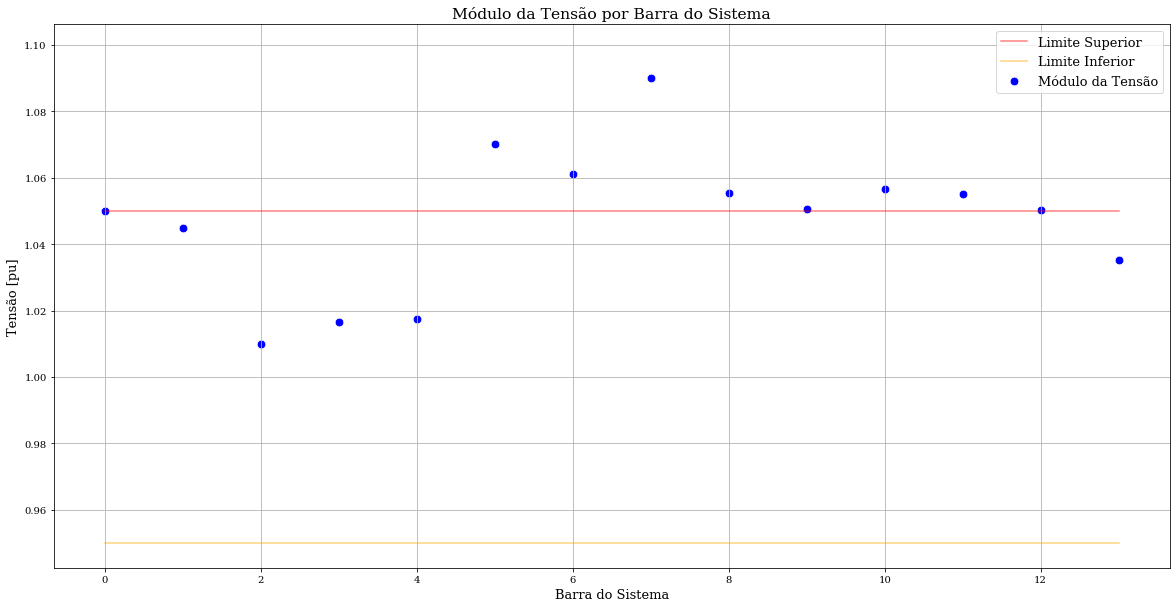

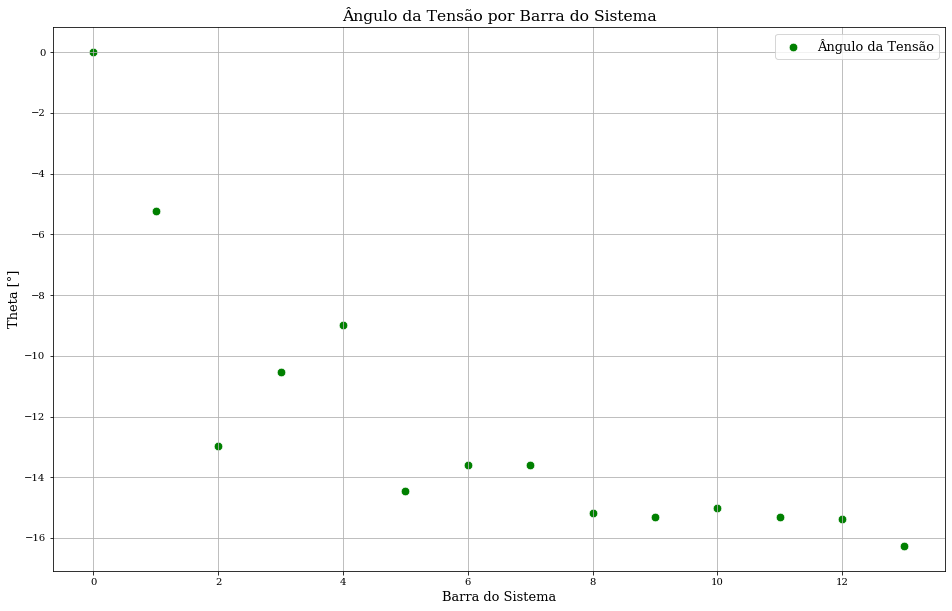

In [52]:
coleta_dados_vbus(sep14,relatorio=True)

## 2.4 Função Para Coletar Tensões e Potências Das Barras de Geração/Controle de Reativo e Seus Respectivos Limites Inferiores e Superiores

In [53]:
def coleta_dados_gen(sep,relatorio=True):
       
    '''
    
    Coleta os Dados de Tensões, Potências Ativa e Reativa e Seus Respectivos Limites Superiores e Inferiores de geração.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------
    sep : sistema elétrico de potência carregado pelo pandapower.
    relatorio : caso relatorio = True, retorna relatório informando, limites, potências e gráficos.
                caso relatorio = False, retorna apenas as tensões, ângulos, potências e limites.
    
    Retorno
    ----------
    vgen : vetor de tensões [pu] das barras de geração
    theta : vetor de ângulo de tensões [°] das barras de geração
    p_lim_superior : Limite Superior de Potência Ativa (pu)
    p_lim_inferior : Limite Inferior de Potência Ativa (pu)
    q_lim_superior : Limite Superior de Potência Reativa (pu)
    q_lim_inferior : Limite Inferior de Potência Ativa (pu)
    
    Observações:
    - - - - - - -
    
    Potência Aparente de Base : 100 MVA
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
        
    '''
    
    sep.res_gen=sep.res_gen.sort_index()
    
    sep.gen=sep.gen.sort_index()
      
    vgen = sep.res_gen['vm_pu'].to_numpy(dtype=np.float64)
    
    barra = sep.gen['bus'].to_numpy(dtype=np.float64)
    
    thetagen = sep.res_gen['va_degree'].to_numpy(dtype=np.float64)
    
    pgen = sep.res_gen['p_mw'].to_numpy(dtype=np.float64)/100
    
    qgen = sep.res_gen['q_mvar'].to_numpy(dtype=np.float64)/100
    
    p_lim_superior = sep.gen["max_p_mw"].to_numpy(dtype=np.float32)/100
    
    p_lim_inferior = sep.gen["min_p_mw"].to_numpy(dtype=np.float32)/100
    
    q_lim_superior = sep.gen["max_q_mvar"].to_numpy(dtype=np.float32)/100
    
    q_lim_inferior = sep.gen["min_q_mvar"].to_numpy(dtype=np.float32)/100

    
    if relatorio==True:
        
        tabela = np.zeros((len(vgen),6))
        tabela[:,0] = pgen
        tabela[:,1] = p_lim_superior
        tabela[:,2] = p_lim_inferior
        tabela[:,3] = qgen
        tabela[:,4] = q_lim_superior
        tabela[:,5] = q_lim_inferior


        table = tabulate.tabulate(tabela, headers = ['P (pu)','P Lim. Sup. (pu)','P Lim. Inf. (pu)','Q (pu)','Q Lim. Sup. (pu)','Q Lim. Inf. (pu)'], tablefmt="psql")
        print(table)
    

        sns.scatterplot(x=barra,y=qgen,color='blue',label='Potência Gerada',s=75)
        sns.lineplot(x=barra,y=q_lim_superior,color='red',label='Limite Superior',alpha=0.5)
        sns.lineplot(x=barra,y=q_lim_inferior,color='orange',label='Limite Inferior',alpha=0.5)
        plt.grid()
        plt.title('Potência Reativa Gerada')
        plt.xlabel('Barra do Sistema')
        plt.ylabel('Potência Reativa (pu)')
        plt.legend(loc='best')
        
    
    if relatorio==False:
        
        return vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra
    
    

### Teste

+----------+--------------------+--------------------+----------+--------------------+--------------------+
|   P (pu) |   P Lim. Sup. (pu) |   P Lim. Inf. (pu) |   Q (pu) |   Q Lim. Sup. (pu) |   Q Lim. Inf. (pu) |
|----------+--------------------+--------------------+----------+--------------------+--------------------|
|      0.4 |                1.4 |                  0 | 0.637159 |               0.5  |              -0.4  |
|      0   |                1   |                  0 | 0.257984 |               0.4  |               0    |
|      0   |                1   |                  0 | 0.138182 |               0.24 |              -0.06 |
|      0   |                1   |                  0 | 0.179653 |               0.24 |              -0.06 |
+----------+--------------------+--------------------+----------+--------------------+--------------------+


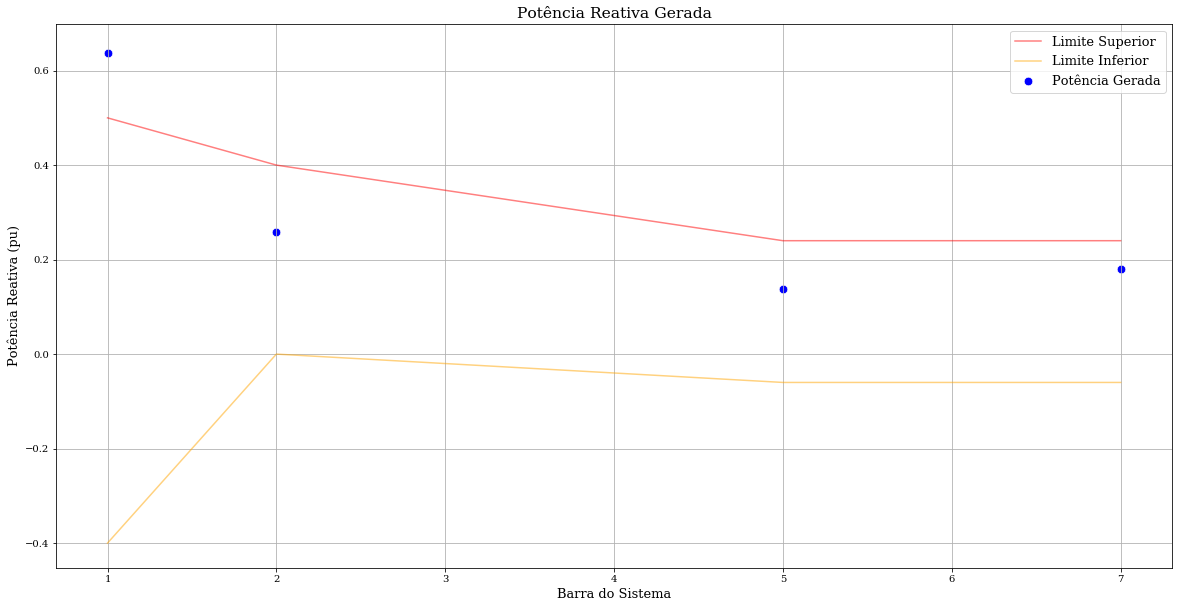

In [54]:
coleta_dados_gen(sep14,relatorio=True)


## 2.5 Função Objetivo Para Calcular as Perdas de Potência Ativa nas Linhas de Transmissão

In [55]:
def func_objetivo(vbarra,theta,condutancias,matriz_z,relatorio=True):
    
       
    '''
    
    Calcula as perdas nas linhas de transmissão de acordo com as tensões, ângulos das barras e condutâncias de linha.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------
    vbarra : tensão da barra.
    theta : ângulo da barra.
    condutancias : matriz de condutâncias de linha (triângulo superior)
    
    caso relatorio = True, retorna relatório informando a matriz de perdas de linha e as perdas totais.
                caso relatorio = False, retorna apenas as perda em pu.
    
    Retorno
    ----------
    
    perdas : perdas de potência ativa em pu.
    
    
    Observações:
    - - - - - - -
    
    Potência Aparente de Base : 100 MVA
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
        
    '''
    
    matriz_v = np.zeros((len(vbarra),len(vbarra)), dtype=np.float64)
    
    matriz_theta = np.zeros((len(theta),len(theta)), dtype=np.float64)
    
    for barra in range(len(vbarra)):
        
        matriz_v[:,barra]=vbarra
        matriz_theta[:,barra]=theta
        
    
    soma_v = np.power(matriz_v,2) + np.power(matriz_v.T,2)
    
    subtrai_theta = matriz_theta - matriz_theta.T
    
    cosenotheta=np.cos(np.radians(subtrai_theta))
    
    produto = 2 * np.multiply(np.multiply(matriz_v, matriz_v.T),cosenotheta)
    
    matriz_perdas = np.multiply(condutancias,soma_v-produto) 

    perdas = np.multiply(matriz_z[4,:], np.power(matriz_z[5,:],2)+np.power(matriz_z[7,:],2)-2*np.multiply(np.multiply(matriz_z[5,:],matriz_z[7,:]),np.cos(np.radians(matriz_z[8,:]-matriz_z[6,:]))))
    perdas = np.sum(perdas)
    
    if relatorio == True:
        
        tabela = np.zeros((1,2))
        tabela[:,0] = perdas
        tabela[:,1] = perdas*100
        table = tabulate.tabulate(tabela, headers = ['Perdas Totais Nas Linhas (pu)','Perdas Totais Nas Linhas (MW)'], tablefmt="psql")
        print(table)
        
        if len(vbarra) ==14:
            plt.figure(figsize=(18,10))
            sns.heatmap(100*(matriz_perdas+matriz_perdas.T),annot=True,cmap="jet")
            plt.xlabel('Barra Origem')
            plt.ylabel('Barra Destino')
            plt.title('Matriz de Perdas de Linha Completa [MW]')

     
    else:
    
        return perdas


### Teste

In [56]:
tensao,angulo, vlims ,vlimi = coleta_dados_vbus(sep300,relatorio=False)
matrizg,matrizz = matriz_condutancia(sep300,relatorio=False)


func_objetivo(tensao,angulo,matrizg,matrizz,relatorio=True)


+---------------------------------+---------------------------------+
|   Perdas Totais Nas Linhas (pu) |   Perdas Totais Nas Linhas (MW) |
|---------------------------------+---------------------------------|
|                         3.53197 |                         353.197 |
+---------------------------------+---------------------------------+


## 2.6 Função Para Calcular a Penalização por Ultrapassagem de Tensão

In [57]:
def pen_tensao(vbus, limite_sup, limite_inf,relatorio=True):
    
    """    
    Calcula a parcela de penalização pura (sem constante de multiplicação) referente a violação dos limites de tensão.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    vbus : tensões das barras do sistema elétrico.
    limite_sup : limite superior das tensões das barras do sistema elétrico.
    limite_inf : limite inferior das tensões das barras do sistema elétrico.
    
    limite_sup : tensões
    relatorio : caso relatorio = True, retorna penalização e nº de violações 
                caso relatorio = False, retorna apenas o valor de penalização.
    Retorno
    -------    
    penalizacao: somatório da diferença ao quadradado das tensões que ultrapassaram os limites inferiores ou superiores.
    
    Observações:
    ------------
    
    ...
    
    """
    
    
    inferior = vbus - limite_inf
    superior = limite_sup - vbus
    penalizacao = np.sum(np.power(superior[superior<0],2))+np.sum(np.power(inferior[inferior<0],2))
    
    if relatorio == True:
        
        print('Penalização de Tensão:\n')
        print(penalizacao,'\n')
        print('Número de Violações:\n')
        print(len(inferior[inferior<0])+len(superior[superior<0]))
     
    else:
    
        return penalizacao


### Teste

In [58]:
pen_tensao(tensao,vlims,vlimi,relatorio=True)

Penalização de Tensão:

0.0006085038498908639 

Número de Violações:

13


## 2.7 Função Para Calcular a Penalização por Ultrapassagem de Geração de Reativo

In [59]:
def pen_ger_reativo(q, limite_sup, limite_inf,sep,relatorio=True):
    
    """    
    Calcula a parcela de penalização pura (sem constante de multiplicação) referente a violação dos limites de geração de reativos.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    q : potências reativas das barras de controle de reativo do sistema elétrico.
    limite_sup : limite superior das potências reativas das barras de controle de reativo do sistema elétrico.
    limite_inf : limite superior das potências reativas das barras de controle de reativo do sistema elétrico.
    
    limite_sup : tensões
    relatorio : caso relatorio = True, retorna penalização e nº de violações 
                caso relatorio = False, retorna apenas o valor de penalização.
    Retorno
    -------    
    penalização: somatório da diferença ao quadradado das potências reativas que ultrapassaram os limites inferiores ou superiores.
    
    Observações:
    ------------
    
    ...
    
    """
    
    inferior = limite_inf - q
    superior = limite_sup - q
    
    ext_sup = sep.ext_grid['max_q_mvar'].to_numpy()
    ext_inf = sep.ext_grid['min_q_mvar'].to_numpy()
    
    qext = sep.res_ext_grid['q_mvar'].to_numpy()
    
    inferiorext = ext_inf - qext
    superiorext =  ext_sup - qext
    
    penalizacaoext = np.sum(np.power(superiorext[superiorext<0],2))+np.sum(np.power(inferiorext[inferiorext>0],2))
    penalizacao = np.sum(np.power(superior[superior<0],2))+np.sum(np.power(inferior[inferior>0],2))
    
    
    if relatorio == True:
        
        print('Penalização de Geração de Reativos:\n')
        print(penalizacao+penalizacaoext,'\n')
        print('Número de Violações:\n')
        print(len(inferior[inferior<0])+len(superior[superior<0]))
        
    else:
    
        return penalizacao+penalizacaoext


### Teste

In [60]:
vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra = coleta_dados_gen(sep14,relatorio=False)

In [61]:
pen_ger_reativo(qgen, q_lim_superior, q_lim_inferior,sep14,relatorio=True)

sep14.res_ext_grid

Penalização de Geração de Reativos:

1420.4244442367258 

Número de Violações:

5


,p_mw,q_mvar
0,232.711479,-37.688269


In [62]:
print('Resultado Esperado:\n')
print(0.0)

Resultado Esperado:

0.0


## 2.8 Função Para Coletar Dados de Carregamento e TAP dos Trafos

In [63]:
def coleta_dados_trafo(sep, relatorio=True):
    
    '''    
    
    
    Valores dos TAPs Retirados de:
    
    - REFORMULAÇÃO DAS RESTRIÇÕESDE COMPLEMENTARIDADE EM PROBLEMAS DE FLUXO DE POTÊNCIA ÓTIMO
      Marina Valença Alencar - Dissertação de Mestrado

    - FUNÇÕES PENALIDADE PARA O TRATAMENTO DAS VARIÁVEIS DISCRETAS DO PROBLEMA DE FLUXO DE POTÊNCIA ÓTIMO REATIVO
      Daisy Paes Silva - Dissertação de Mestrado
    

    ''' 
    """    
    Coleta dados de Carregamento, Taps e Informações dos Transformadores do Sistema.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    sep : sistema elétrico a ser estudado.
    
    relatorio : caso relatorio = True, retorna gráficos dos taps e carregamento com informações
                caso relatorio = False, retorna valores referentes aos taps.
    Retorno
    -------    
    tap_pos : posição do tap.
    tap_neutral : valor do tap neutral.
    tap_step_percent : valor do percentual de passo.
    valores_taps : valores dos taps programados para esse sistema.
    
    
    Observações:
    ------------
    
    ...
    
    """

    sep.trafo.sort_index()
   
    sep.res_trafo.sort_index()
    
    sep.trafo['tap_pos']=sep.trafo['tap_pos']
    
    n_trafos_controlados = sep.trafo['tap_pos'].count()
    
    carregamento = sep.res_trafo['loading_percent'].to_numpy()/100
    
    tap_pos = sep.trafo[~pd.isnull(sep.trafo['tap_pos'])]['tap_pos'].to_numpy(dtype=np.float64)
    
    tap_neutral = sep.trafo[~pd.isnull(sep.trafo['tap_neutral'])]['tap_neutral'].to_numpy(dtype=np.float64)
    
    tap_step_percent = sep.trafo[~pd.isnull(sep.trafo['tap_step_percent'])]['tap_step_percent'].to_numpy(dtype=np.float64)
        
    
    if len(sep.bus)==14:
        
        step = 0.00625
        valores_taps = np.arange(start = 0.9, stop = 1.1, step = step)
        
        
    if len(sep.bus)==30:
        
        step = 0.00625
        valores_taps = np.arange(start = 0.9, stop = 1.1, step = step)
        
                
    if len(sep.bus)==118:
        
        step = 0.00625
        valores_taps = np.arange(start = 0.9, stop = 1.1, step = step)

                    
    if len(sep.bus)==300:
        
        step = 0.00625
        valores_taps = np.arange(start = 0.9, stop = 1.1, step = step)
        
        
    if relatorio == True:
        
    
        tap_pos = sep.trafo[~pd.isnull(sep.trafo['tap_pos'])]['tap_pos'].to_numpy(dtype=np.float64)

        tap_neutral = sep.trafo[~pd.isnull(sep.trafo['tap_neutral'])]['tap_neutral'].to_numpy(dtype=np.float64)

        tap_step_percent = sep.trafo[~pd.isnull(sep.trafo['tap_step_percent'])]['tap_step_percent'].to_numpy(dtype=np.float64)
        
        valor_percentual= (tap_pos-tap_neutral)*(tap_step_percent/100) + 1
        
        plt.figure(figsize=(20,10))
        sns.scatterplot(x=np.arange(0,len(sep.trafo),1),y=carregamento,label='Carregamento',color='b',s=75)
        sns.lineplot(x=np.arange(0,len(sep.trafo),1),y=np.ones((len(sep.trafo))),label='Limite Máximo de Carregamento',color='r')
        plt.grid()
        
        plt.xlabel('Nº do Trafo')
        plt.ylabel('Carregamento %')
        plt.title('Carregamento dos Transformadores')
        
        if len(sep.bus)==14:

            plt.figure(figsize=(20,10))
            sns.scatterplot(x=np.arange(0,len(tap_pos)),y=valor_percentual,label='Valor do TAP',color='b',s=75)
            sns.lineplot(x=np.arange(0,len(tap_pos)),y=np.tile([1.12], (len(tap_pos))),label='Limite Máximo do TAP',color='r')
            sns.lineplot(x=np.arange(0,len(tap_pos)),y=np.tile([0.88], (len(tap_pos))),label='Limite Mínimo do TAP',color='orange')
            plt.grid()


        if len(sep.bus)==30:
        
            plt.figure(figsize=(20,10))
            sns.scatterplot(x=np.arange(0,len(tap_pos)),y=valor_percentual,label='Valor do TAP',color='b',s=75)
            sns.lineplot(x=np.arange(0,len(tap_pos)),y=np.tile([1.12], (len(tap_pos))),label='Limite Máximo do TAP',color='r')
            sns.lineplot(x=np.arange(0,len(tap_pos)),y=np.tile([0.88], (len(tap_pos))),label='Limite Mínimo do TAP',color='orange')
            plt.grid()
        
        if len(sep.bus)==118:
        
            plt.figure(figsize=(20,10))
            sns.scatterplot(x=np.arange(0,len(tap_pos)),y=valor_percentual,label='Valor do TAP',color='b',s=75)
            sns.lineplot(x=np.arange(0,len(tap_pos)),y=np.tile([1.12], (len(tap_pos))),label='Limite Máximo do TAP',color='r')
            sns.lineplot(x=np.arange(0,len(tap_pos)),y=np.tile([0.88], (len(tap_pos))),label='Limite Mínimo do TAP',color='orange')
            plt.grid()
        
        print('Carregamento do Trafo (pu):\n')
        print(carregamento,'\n')
        print('Número de Trafos com TAP Controlado:\n')
        print(n_trafos_controlados,'\n')
        print('Valores dos TAPs:\n')
        print(valor_percentual,'\n')
        
        
    else:
        
        return tap_pos, tap_neutral, tap_step_percent,valores_taps
    

### Teste

Carregamento do Trafo (pu):

[8.01495275e-03 2.82577454e-03 5.18450805e-05 4.92392106e-03
 1.42373759e-02 9.29770068e-03 1.08906005e-02 3.37616993e-02
 6.66686411e-02 5.59833370e-02 1.04179070e-02 1.12232961e-02
 6.05601719e-02 5.18026966e-05 1.25300564e-01 4.15912338e-02
 4.30667108e-02 5.67227522e-02 4.15859740e-02 4.68539404e-02
 1.28055337e-01 2.38622178e-02 1.77955026e-02 4.36855728e-02
 1.16016002e-04 7.26193218e-02 4.06085246e-02 4.60273229e-02
 5.02292612e-02 1.85614352e-02 5.50611555e-03 5.17947729e-03
 1.47924166e-02 1.15472667e-04 2.19420715e-04 1.63165970e-04
 2.25539299e-04 1.16327134e-04 9.44531004e-05 1.75605241e-04
 1.76689898e-03 2.03265779e-04 1.94480153e-04 3.34764199e-04
 2.16141253e-04 3.05184151e-04 1.37918293e-04 1.21246538e-02
 1.97109297e-02 1.01419863e-02 1.34385425e-02 3.80178792e-03
 1.66219205e-02 5.51629134e-03 5.18570200e-03 9.46583068e-03
 7.98067890e-02 1.06390781e-02 4.71699656e-03 1.19466305e-02
 1.17231023e-03 2.75573998e-02 4.14288226e-03 2.22154505

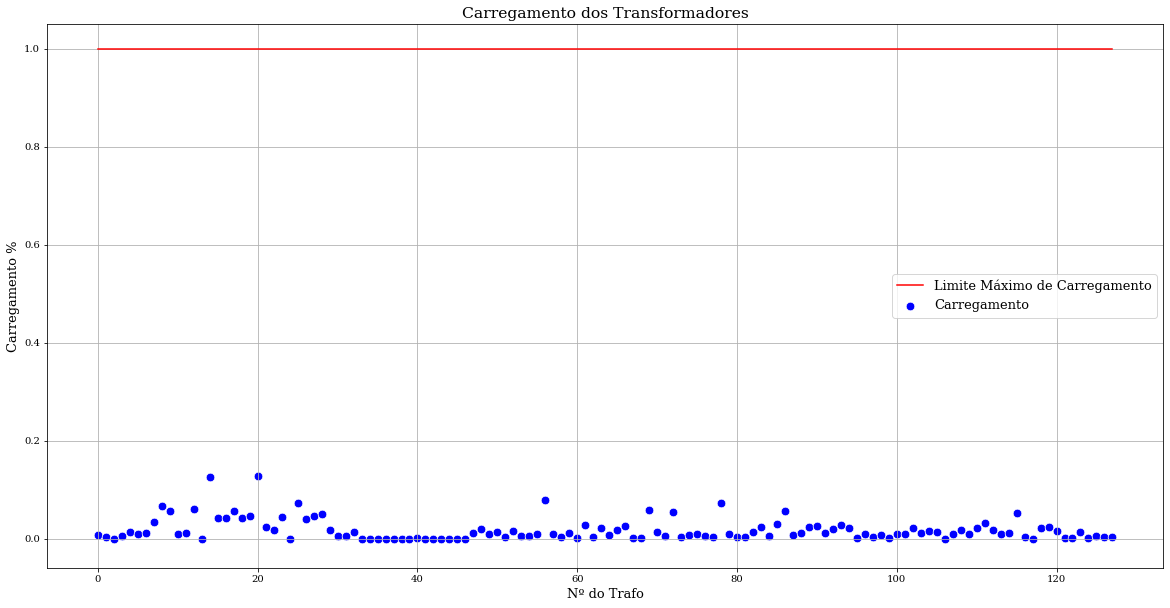

In [64]:
coleta_dados_trafo(sep300,relatorio=True)


In [65]:
def pen_trafo(linha,n_tap,n_vgen):
    
    '''    
    
    
    Valores dos TAPs Retirados de:
    
    - REFORMULAÇÃO DAS RESTRIÇÕESDE COMPLEMENTARIDADE EM PROBLEMAS DE FLUXO DE POTÊNCIA ÓTIMO
      Marina Valença Alencar - Dissertação de Mestrado

    - FUNÇÕES PENALIDADE PARA O TRATAMENTO DAS VARIÁVEIS DISCRETAS DO PROBLEMA DE FLUXO DE POTÊNCIA ÓTIMO REATIVO
      Daisy Paes Silva - Dissertação de Mestrado
    

    ''' 
    """    
   
    Calcula a penalização senoidal para taps não discretos.
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
    
    Parâmetros
    ----------   
    linha : linha da partícula.
    n_tap : número de taps.
    n_vgen : número de geradores.
    
    Retorno
    -------    
    linha : linha da partícula com os valores da penalização do trafo atualizados.
    
    
    Observações:
    ------------
    
    ...
    
    """
    
    step = 0.00625

    linha[-3] = np.sum(np.square(np.sin((linha[n_vgen:n_vgen+n_tap]*np.pi/step))))
    
    return linha

### Teste

In [66]:
pen_trafo(np.array([0,0,0,0,0.95,0.97,1.003,0,0,0,0,0,0,0]), n_tap=3, n_vgen=4)

array([0.        , 0.        , 0.        , 0.        , 0.95      ,
       0.97      , 1.003     , 0.        , 0.        , 0.        ,
       0.        , 1.34154885, 0.        , 0.        ])

## 2.9 Função Para Coletar Dados dos Reativos Shunt

In [67]:
def coleta_dados_bshunt(sep):
    
    '''    
    
    
    Valores dos Shunt Retirados de:
    
    - REFORMULAÇÃO DAS RESTRIÇÕESDE COMPLEMENTARIDADE EM PROBLEMAS DE FLUXO DE POTÊNCIA ÓTIMO
      Marina Valença Alencar - Dissertação de Mestrado

    - FUNÇÕES PENALIDADE PARA O TRATAMENTO DAS VARIÁVEIS DISCRETAS DO PROBLEMA DE FLUXO DE POTÊNCIA ÓTIMO REATIVO
      Daisy Paes Silva - Dissertação de Mestrado
          

    ''' 
    
    ieee14 = np.arange(0.00,0.40,0.01)
    ieee30 = np.arange(0.00,0.40,0.01)
    ieee118 = np.arange(0.00,0.40,0.01)
    
    bus = sep.shunt['bus'].sort_values().to_numpy()
    sep.shunt=sep.shunt.sort_index()
  
    
    if len(sep.bus)==14:
        
        #bsh = np.array([[0,0.05,0.15,0.19,0.20,0.24,0.34,0.39]])
        bsh = np.array([ieee14])
        
        
    if len(sep.bus)==30:
        
        #bsh = np.array([[0,0.05,0.15,0.19,0.20,0.24,0.34,0.39],[0, 0.04, 0.05, 0.09]])
        bsh = np.array([ieee30,ieee30])
        
                
    if len(sep.bus)==118:
        
       # bsh = np.array([[-0.40, -0.20, 0]
        #                ,
         #               [0, 0.06, 0.07, 0.13, 0.14, 0.20],
          #              [-0.25, -0.20, 0],
           #             [0, 0.10],
            #            [0, 0.10],
             #           [0, 0.10],
              #          [0, 0.15],
               #         [0.08, 0.12, 0.20],
                #        [0.10, 0.20],
                 #       [0.10, 0.20],
                  #      [0.10, 0.20],
                   #     [0.10, 0.20],
                    #    [0, 0.06, 0.07, 0.13, 0.14, 0.20],
                     #   [0, 0.06, 0.07, 0.13, 0.14, 0.20]])
                        
                                
        bsh = np.array([ieee118
                        ,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118,
                        ieee118])
                            
    if len(sep.bus)==300:
        
        bsh = np.array([[0,2,3.5,4.5], #95
                [0, 0.25, 0.44, 0.59], #98
                [0,0.19,0.34,0.39], #132
                [-4.5,0], #142
                [-4.5,0], #144
                [0, 0.25,0.44,0.59], #151
                [0, 0.25,0.44,0.59], #157
                [-2.5,0], #168
                [-4.5,0], #209
                [-4.5,0],#216
                [-1.5,0], #218
                [0, 0.25, 0.44, 0.59], #226
                [0, 0.15], #267
                [0], #274
                [0], #276
                [0], #277
                [0], #278
                [0], #279
                [0], #280
                [0], #281
                [0,0.15], #282
                [0], #283
                [0], #285
                [0], #286
                [0], #287
                [0], #288
                [0], #296
                [0], #297
                [0], #299
               ])
    
    
    
    return bsh, bus


In [68]:
bsh,bus=coleta_dados_bshunt(sep118)

In [69]:
bsh

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39],
       [0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0

## 2.10 Função para Calcular a Penalização Bshunt

In [70]:
def pen_bshunt(grupo,n_tap,n_vgen,n_bshunt,sep):
    
    b = grupo[n_tap+n_vgen:n_tap+n_vgen+n_bshunt]
    
    bsh,bus=coleta_dados_bshunt(sep)
    
    penal = 0
    
    i=0

    bs=[]

    for i in range(len(bsh)):
    
        bs.append(np.array(bsh[i]))
    
    for i in range(len(bs)):
                
        if len(bs[i][bs[i]<=b[i]])==0:
            penal=1
            return penal
        if len(bs[i][bs[i]>=b[i]])==0:
            penal=1
            return penal
            
        anterior = bs[i][bs[i]<=b[i]][-1]
        posterior = bs[i][bs[i]>=b[i]][0]
        alfa = np.pi*(np.ceil((anterior/(0.001+posterior-anterior)))-(anterior/(0.001+posterior-anterior)))
        penal = penal + np.square(np.sin((b[i]/(0.001+posterior-anterior))*np.pi+alfa))

    
    return penal    
    

### Teste

In [71]:
# Valor presente no conjunto de discretos
pen_bshunt(np.array([0,0,0,0,0,0,0,-5,0,0,0,0,0,0]),3,4,1,sep14)

1

In [72]:
# Valor não presente no conjunto de discretos

pen_bshunt(np.array([0,0,0,0,0,0,0,0.12,0,0,0,0,0,0]),3,4,1,sep14)

1.859116307175393e-27

## 2.11 Função Para Converter TAPS

In [73]:
def converte_trafo(tap_pos, tap_neutral, tap_step_percent,valores_taps):
    
    '''
    Converte TAPS conforme equação disponibilizada pelo pandapower.
    
    https://pandapower.readthedocs.io/en/v2.1.0/elements/trafo.html
    
    '''
    
    taps_convertido = tap_neutral + ((valores_taps - 1.0)*(100/tap_step_percent))
    
    
    return taps_convertido

### Teste

In [74]:
tap_pos, tap_neutral, tap_step_percent,valores_taps = coleta_dados_trafo(sep14,relatorio=False)

converte_trafo(np.array([0.98,0.95,1.1]), tap_neutral, tap_step_percent,valores_taps[0])

array([-4.54545455, -3.22580645, -1.47058824])

## 2.12 Função Para Criar Alcateia

In [75]:
def cria_alcateia(sep,n_lobos):
    
    """"
    
    Cria a alcatéia de lobos cinzentos.
    
    linhas = partículas
    
    colunas = tensões geradores, tap transformadores, susceptâncias shunt, perdas, penalização de tensão, penalização de reativo, penalização de trafo, penalização shunt, fitness
   
    
    """
    
    
    vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra = coleta_dados_gen(sep,relatorio=False)
    
    n_vgen=len(vgen)
    
    vbus, theta, v_lim_superior, v_lim_inferior = coleta_dados_vbus(sep,relatorio=False)
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps=coleta_dados_trafo(sep,relatorio=False)
    
    n_taps = len(tap_pos)
    
    bshunt , bus = coleta_dados_bshunt(sep)
    
    n_bshunt = len(bus)
    
    dimensao = n_taps + n_vgen + n_bshunt + 6
    
    alcateia=np.zeros((n_lobos,dimensao),dtype=np.float64)
    
    alcateia[:,0:n_vgen] = np.random.uniform(np.max(v_lim_inferior), np.max(v_lim_superior), size=(n_lobos,n_vgen))
    
    alcateia[:,n_vgen:n_vgen+n_taps]=np.random.choice(valores_taps, size =(n_lobos, n_taps))
    
    i=1
    
    i=1
    
    for bsh in bshunt:
        
        alcateia[:,n_vgen+n_taps+i-1:n_vgen+n_taps+i] = np.random.choice(bsh, size =(n_lobos, 1))
        i=i+1

    return alcateia
    
    
    

### Teste

In [76]:
cria_alcateia(sep300,1)


array([[ 0.97061287,  1.02003009,  0.95935139,  1.00247046,  0.9492759 ,
         1.04515243,  0.97686519,  0.97213826,  1.05294068,  0.98095057,
         0.98950317,  1.01635377,  0.95167044,  0.98084898,  0.96694477,
         0.95673567,  0.97602477,  1.05553591,  0.98640529,  0.97899223,
         1.02456408,  1.05078917,  0.95704266,  1.03503228,  1.05915058,
         0.97604739,  0.97335851,  1.0385723 ,  1.04457816,  1.01211271,
         1.02794979,  1.00800102,  0.99749586,  0.99094775,  0.95737085,
         0.98960136,  1.0069896 ,  1.01731058,  0.95414748,  0.97106686,
         0.99815147,  0.96320491,  0.98456203,  0.96962623,  1.05220782,
         1.01692141,  0.94527532,  1.02766461,  0.97253078,  1.02309545,
         1.05484591,  0.95733768,  0.95596558,  0.94690991,  1.05059915,
         0.97531327,  1.05879238,  0.98958704,  1.04816361,  0.98615141,
         1.02505125,  1.00771715,  0.9699233 ,  0.97232868,  0.96997097,
         1.04722771,  1.05033974,  1.03788956,  1.0

## 2.13 Função Para Criar o Enxame de Partículas

In [77]:
def cria_enxame(sep,n_particulas):
    
    """"
    
    Cria o enxame de partículas.
    
    
    linhas = partículas
    
    colunas = tensões geradores, tap transformadores, susceptâncias shunt, perdas, penalização de tensão, penalização de reativo, penalização de trafo, penalização shunt, fitness
    
    """
    
    
    vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra = coleta_dados_gen(sep,relatorio=False)
    
    n_vgen=len(vgen)
    
    vbus, theta, v_lim_superior, v_lim_inferior = coleta_dados_vbus(sep,relatorio=False)
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps=coleta_dados_trafo(sep,relatorio=False)
    
    n_taps = len(tap_pos)
    
    bshunt , bus = coleta_dados_bshunt(sep)
    
    bshunt = np.array(bshunt)
    
    n_bshunt = len(bus)
    
    dimensao = n_taps + n_vgen + n_bshunt + 6
    
    enxame=np.zeros((n_particulas,dimensao),dtype=np.float64)
    
    enxame[:,0:n_vgen] = np.random.uniform(np.max(v_lim_inferior), np.max(v_lim_superior), size=(n_particulas,n_vgen))
    
    enxame[:,n_vgen:n_vgen+n_taps]=np.random.choice(valores_taps, size =(n_particulas, n_taps))
    
    i=1
    
    for bsh in bshunt:
        
        enxame[:,n_vgen+n_taps+i-1:n_vgen+n_taps+i] = np.random.choice(bsh, size =(n_particulas, 1))
        i=i+1
        
    return enxame

### Teste

In [78]:
cria_enxame(sep14,5)

array([[1.02268991, 0.98000964, 0.95216042, 0.96978669, 1.        ,
        1.08125   , 0.99375   , 0.36      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.99674716, 0.98001323, 0.9832049 , 1.04340877, 1.05      ,
        0.9875    , 1.1       , 0.05      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.99463477, 0.98283593, 1.00229202, 1.04058585, 1.        ,
        0.95      , 0.9       , 0.15      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.0155998 , 1.02085462, 1.00699199, 0.96543636, 1.06875   ,
        1.01875   , 0.925     , 0.04      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.02597748, 0.95117918, 1.0223459 , 0.99598979, 1.0125    ,
        0.925     , 0.925     , 0.26      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

## 2.14 Função para Calcular o Fluxo de Potência

In [79]:
def fluxo_de_pot(grupo, sep):
    
    n_bshunt = len(sep.shunt)
    n_vgen = len(sep.gen)
    n_tap = np.abs(sep.trafo['tap_pos']).count()
    
    matrizg = matriz_condutancia(sep,relatorio=False)
    
    for linha in range(grupo.shape[0]):
        
        sep.gen['vm_pu']=grupo[linha,0:n_vgen]
        
        tap_pos, tap_neutral, tap_step_percent,valores_taps=coleta_dados_trafo(sep,relatorio=False)
        
        sep.trafo['tap_pos'][~pd.isnull(sep.trafo['tap_pos'])]=converte_trafo(tap_pos, tap_neutral, tap_step_percent,grupo[linha,n_vgen:n_vgen+n_tap])
        
        sep.shunt['q_mvar']=grupo[linha,n_vgen+n_tap:n_vgen+n_tap+n_bshunt]*-100
        
        if len(sep.bus)==300:
        
            pp.runpp(sep,algorithm='fdbx',numba=True, init = 'results', tolerance_mva = 1e-4,max_iteration=100000)
        
        else:
        
            pp.runpp(sep,algorithm='nr',numba=True, init = 'results', tolerance_mva = 1e-5,max_iteration=10000)
        
        vbus, theta, v_lim_superior, v_lim_inferior=coleta_dados_vbus(sep,relatorio=False)
        
        grupo[linha,-6] = sep.res_line['pl_mw'].sum()/100 #func_objetivo(vbus,theta,matrizg,relatorio=False)

        grupo[linha,-5] = pen_tensao(vbus, v_lim_superior, v_lim_inferior,relatorio=False)
        
        vgen, thetagen, pgen, qgen, p_lim_superior, p_lim_inferior, q_lim_superior, q_lim_inferior,barra = coleta_dados_gen(sep,relatorio=False)
        
        grupo[linha,-4] = pen_ger_reativo(qgen, q_lim_superior, q_lim_inferior,sep,relatorio=False)
        
        grupo[linha,:] = pen_trafo(grupo[linha,:],n_tap,n_vgen)
        
        
        grupo[linha,-2] = pen_bshunt(grupo[linha,:],n_tap,n_vgen,n_bshunt,sep)
  
        
        
    
    return grupo
    

### Teste

In [80]:
#for i in range(100):
enxame=cria_enxame(sep300,1)
fluxo_de_pot(enxame,sep300)


array([[ 1.01182583e+00,  1.05480438e+00,  1.05575253e+00,
         9.55943141e-01,  1.05223103e+00,  1.00379963e+00,
         9.43666826e-01,  9.59639341e-01,  9.50587131e-01,
         1.00382572e+00,  1.01651568e+00,  1.02512950e+00,
         9.58506252e-01,  9.92672746e-01,  9.48901761e-01,
         9.44292254e-01,  9.69119913e-01,  1.05262209e+00,
         9.54921146e-01,  9.72177258e-01,  9.62360045e-01,
         1.03702951e+00,  9.97091053e-01,  9.89966126e-01,
         1.03026042e+00,  1.03517819e+00,  9.59779945e-01,
         1.04614050e+00,  1.05474045e+00,  1.01141369e+00,
         1.03595857e+00,  9.66028773e-01,  1.04010985e+00,
         1.00166712e+00,  1.00754689e+00,  9.96961362e-01,
         9.87159198e-01,  9.54099021e-01,  1.01294176e+00,
         1.01254886e+00,  9.40232916e-01,  1.05295171e+00,
         1.00080018e+00,  9.52634976e-01,  1.03321311e+00,
         9.51724070e-01,  1.01111851e+00,  1.01481325e+00,
         1.00704071e+00,  1.04425439e+00,  1.01765497e+0

## 2.15 Função para Calcular o Fitness (J)

In [81]:
def fitness (grupo,zeta,psi,sigma,omega):
    
# fitness J       perdas         pen tensão         pen q mvar          pen trafo           pen bshunt       
    grupo[:,-1]=(grupo[:,-6])+(zeta*grupo[:,-5])+(psi*grupo[:,-4])+(sigma*grupo[:,-3])+(omega*grupo[:,-2])

    return grupo

### Teste

In [82]:
fitness(enxame,100,100,100,100)

array([[ 1.01182583e+00,  1.05480438e+00,  1.05575253e+00,
         9.55943141e-01,  1.05223103e+00,  1.00379963e+00,
         9.43666826e-01,  9.59639341e-01,  9.50587131e-01,
         1.00382572e+00,  1.01651568e+00,  1.02512950e+00,
         9.58506252e-01,  9.92672746e-01,  9.48901761e-01,
         9.44292254e-01,  9.69119913e-01,  1.05262209e+00,
         9.54921146e-01,  9.72177258e-01,  9.62360045e-01,
         1.03702951e+00,  9.97091053e-01,  9.89966126e-01,
         1.03026042e+00,  1.03517819e+00,  9.59779945e-01,
         1.04614050e+00,  1.05474045e+00,  1.01141369e+00,
         1.03595857e+00,  9.66028773e-01,  1.04010985e+00,
         1.00166712e+00,  1.00754689e+00,  9.96961362e-01,
         9.87159198e-01,  9.54099021e-01,  1.01294176e+00,
         1.01254886e+00,  9.40232916e-01,  1.05295171e+00,
         1.00080018e+00,  9.52634976e-01,  1.03321311e+00,
         9.51724070e-01,  1.01111851e+00,  1.01481325e+00,
         1.00704071e+00,  1.04425439e+00,  1.01765497e+0

## 2.16 Função para Validação

In [83]:
def validacao (sep, best_solution):
       
    valida = fluxo_de_pot(np.array([best_solution]), sep)
           
    print('Sistema Simulado Para a Solução:\n')
    print(valida[0][:-6])
    print(' ')
    
    print('Perdas de Potência Ativa [PU]:\n')
    print(valida[0][-6])
    print(' ')
    
    print('Penalização de Violação de Tensão [PU]:\n')
    print(valida[0][-5])
    print(' ')
    
    print('Penalização de Violação de Geração de Reativo [PU]:\n')
    print(valida[0][-4])
    print(' ')
    
    print('Penalização de Violação de TAP Discreto [PU]:\n')
    print(valida[0][-3])
    print(' ')
    
    print('Penalização de Violação de Bshunt Discreto [PU]:\n')
    print(valida[0][-2])
    print(' ')
    
    print('Fitness:\n')
    print(fitness(np.array([best_solution]),1000,1000,10,10)[0][-1])
    print(' ')
    

## 3. Implementação de Métodos de Otimização Meta-Heurísticos

## 3.1 Método Alcateia de Lobos Cinzentos 

In [157]:
def otimizacao_alcateia_de_lobos_cinzentos(sep, zeta, psi, sigma, omega, max_iter, n_lobos,valor_inicial,relatorio=True,inicial=True):
        
    alcateia_fit = cria_alcateia(sep,n_lobos)

    if inicial == True:
        
        alcateia_fit[0,:]=valor_inicial
    
    
    j = []
    
    perdas = []
    
    tempo = []
    
    pen_v = []
    
    pen_gq = []
    
    pen_tap = []
    
    pen_bsh = []

    
    v_lim_superior = np.repeat(sep.bus['max_vm_pu'][0], len(sep.gen))
    v_lim_inferior = np.repeat(sep.bus['min_vm_pu'][0], len(sep.gen))
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps = coleta_dados_trafo(sep,relatorio=False)
    
    tap_max = np.repeat(valores_taps[-1], len(tap_pos))
    
    tap_min = np.repeat(valores_taps[0], len(tap_pos))
    
    bsh,b=coleta_dados_bshunt(sep)

    bsh_max=[]
    
    bsh_min=[]
    
    alcateias = []
    
    for bs in bsh:
        bsh_max.append([np.max(bs)])
        bsh_min.append([np.min(bs)])


    maximo = np.expand_dims(np.concatenate((v_lim_superior, tap_max, bsh_max), axis = None), 0)
    minimo = np.expand_dims(np.concatenate((v_lim_inferior, tap_min, bsh_min), axis = None), 0)
     
    
    lim_sup = np.tile(maximo, (n_lobos,1))
    lim_inf = np.tile(minimo, (n_lobos,1))
    
    
    for i in range(0,max_iter):

        start = time.time()
       
        alcateia_fit = fluxo_de_pot(alcateia_fit,sep)
        
        alcateia_fit = fitness(alcateia_fit,zeta,psi,sigma,omega)

        alcateia_fit = alcateia_fit[np.argsort(alcateia_fit[:, -1])]
        
        a = (2 - (i*(2/max_iter)))
        
        mu = 0.5
        sigma = 0.15
        
        r1 = np.random.normal(mu, sigma, size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))
        r2 = np.random.normal(mu, sigma, size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))
        
        #r1 = np.random.random_sample(size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))
        
        #r2 = np.random.random_sample(size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))

        A = (2*a*r1) - a
        
        C = 2*r2
        
        if (i == 0):
        
            lobo_alfa = alcateia_fit[0, :].copy()
            lobo_beta = alcateia_fit[1, :].copy()
            lobo_delta = alcateia_fit[2, :].copy()
            
            alfa = np.expand_dims(alcateia_fit[0,0:-6].copy(), 1)
            beta = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)
            delta = np.expand_dims(alcateia_fit[2,0:-6].copy(), 1)
            
        
        for t in range(3):

            if (alcateia_fit[t, -1] < lobo_alfa[-1]):

                lobo_alfa = alcateia_fit[0,:].copy()
                    
                alcateias.append(alcateia_fit)

                alfa = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)

            if (alcateia_fit[t,-1] > lobo_alfa[-1] and alcateia_fit[t,-1] < lobo_beta[-1]):

                lobo_beta = alcateia_fit[1,:].copy()

                beta = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)

            if (alcateia_fit[t,-1] > lobo_alfa[-1] and alcateia_fit[t,-1] > lobo_beta[-1] and alcateia_fit[t,-1] < lobo_delta[-1]):

                lobo_delta = alcateia_fit[2, :].copy()

                delta = np.expand_dims(alcateia_fit[2,0:-6].copy(), 1)         
        

        d_alfa = np.abs(np.multiply(C, alfa.T) - alcateia_fit[:, 0:-6])*0.1

        d_beta = np.abs(np.multiply(C, beta.T) - alcateia_fit[:, 0:-6])*0.1

        d_delta = np.abs(np.multiply(C, delta.T) - alcateia_fit[:, 0:-6])*0.1

        x_alfa = alfa.T - np.multiply(A, d_alfa)

        x_beta = beta.T - np.multiply(A, d_beta)

        x_delta = delta.T - np.multiply(A, d_delta)

        alcateia_fit[:,0:-6] = (x_alfa + x_beta + x_delta)/3

        alca_estat = alcateia_fit[:,-6:]

        alcateia_fit = np.concatenate(( np.clip(alcateia_fit[:,0:-6], a_min = lim_inf, a_max = lim_sup, out = alcateia_fit[:,0:-6]),alca_estat),axis=1)
        
        
        end = time.time()

        elapsed = end - start
        
        j.append(lobo_alfa[-1])

        perdas.append(lobo_alfa[-6])

        pen_v.append(lobo_alfa[-5])

        pen_gq.append(lobo_alfa[-4])

        pen_tap.append(lobo_alfa[-3])

        pen_bsh.append(lobo_alfa[-2])       
        
        
        tempo.append(elapsed)
        
        if relatorio == True:
            
            print(' ')

            print('Lobo Alfa da Iteração:',i)

            print('Perdas (pu):',lobo_alfa[-6])

            print('Penalização de Tensão:',lobo_alfa[-5])

            print('Penalização de Geração de Reativo:',lobo_alfa[-4])

            print('Penalização do Tap:',lobo_alfa[-3])

            print('Penalização do Bshunt:',lobo_alfa[-2])

            print('Fitness:',lobo_alfa[-1])
            
            print('Tempo: ',elapsed)

            print(' ')

            print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
            
    if relatorio == True:
        
            plt.figure(figsize=(18,10))
            plt.plot(perdas)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Perdas de Potência Ativa (pu)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(j)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Fitness (J)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_v)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização de Tensão')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_gq)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização de Geração de Reativo')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_tap)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização do TAP')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_bsh)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização do BShunt')
            plt.xlabel('Número da Iteração')

    return j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,alcateias,lobo_alfa, lobo_beta, lobo_delta, tempo

    

## 3.2 Método Enxame de Partículas

In [158]:
def otimizacao_enxame_de_particulas(sep, zeta, psi, sigma, omega, max_iter, n_particles,c1,c2,v_amp,valor_inicial,relatorio=True,inicial=True):
        
    enxame_fit = cria_enxame(sep,n_particles)
    
    if inicial == True:
        
        enxame_fit[0,:]=valor_inicial
        
    
    w_max=0.9
    w_min=0.4
    
    j = []
    
    tempo = []
        
    perdas = []
    
    pen_v = []
    
    pen_gq = []
    
    pen_tap = []
    
    pen_bsh = []

    
    v_lim_superior = np.repeat(sep.bus['max_vm_pu'][0], len(sep.gen))
    
    v_lim_inferior = np.repeat(sep.bus['min_vm_pu'][0], len(sep.gen))
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps = coleta_dados_trafo(sep,relatorio=False)
    
    tap_max = np.repeat(valores_taps[-1], len(tap_pos))
    
    tap_min = np.repeat(valores_taps[0], len(tap_pos))
    
    bsh,b=coleta_dados_bshunt(sep)

    bsh_max=[]
    
    bsh_min=[]
    

    for bs in bsh:
        bsh_max.append([np.max(bs)])
        bsh_min.append([np.min(bs)])


    maximo = np.expand_dims(np.concatenate((v_lim_superior, tap_max, bsh_max), axis = None), 0)
    minimo = np.expand_dims(np.concatenate((v_lim_inferior, tap_min, bsh_min), axis = None), 0)
     
    
    lim_sup = np.tile(maximo, (n_particles,1))
    lim_inf = np.tile(minimo, (n_particles,1))
    
    v_anterior = v_amp*cria_enxame(sep,n_particles)

    for i in range(0,max_iter):
        
        start = time.time()
        
        mu, sigma = 0.5, 0.152 # mean and standard deviation

        r1 = np.random.normal(mu, sigma, size = (n_particles,enxame_fit.shape[1]))
        r2 = np.random.normal(mu, sigma, size = (n_particles,enxame_fit.shape[1]))
        
        #r1 = np.random.random_sample(size = (n_particles,enxame_fit.shape[1]))
        
        #r2 = np.random.random_sample(size = (n_particles,enxame_fit.shape[1]))
    
       
        enxame_fit = fluxo_de_pot(enxame_fit,sep)
        
        enxame_fit = fitness(enxame_fit,zeta,psi,sigma,omega)

        if i==0:
            
            best_particles = enxame_fit.copy()

            global_best = best_particles[np.argsort(best_particles[:, -1])][0,:].copy()
            
            global_matriz = np.tile(global_best, (n_particles,1))
        
            
           
        for t in range(0,n_particles):
                
            if enxame_fit[t,-1] < best_particles[t,-1]:
                    
                best_particles[t,:] = enxame_fit[t,:].copy()
                    

        global_best = best_particles[np.argsort(best_particles[:, -1])][0,:].copy()
            
        global_matriz = np.tile(global_best, (n_particles,1))   
            
        
        enxame_fit_anterior = enxame_fit.copy()
        
        w_novo = w_max-(w_max-w_min)*(i+1)/max_iter
        v_novo = np.multiply(w_novo,v_anterior.copy()) + c1*np.multiply(r1,(best_particles.copy()-enxame_fit.copy())) + c2*np.multiply(r2,(global_matriz.copy()-enxame_fit.copy()))
        
        enxame_fit_novo = enxame_fit_anterior  + v_novo
        
        v_anterior = v_novo.copy()
        
        enxame_estat = enxame_fit_novo[:,-6:]

        enxame_fit = np.concatenate(( np.clip(enxame_fit_novo[:,0:-6], a_min = lim_inf, a_max = lim_sup, out = enxame_fit_novo[:,0:-6]),enxame_estat),axis=1)   


        
        end = time.time()

        elapsed = end - start

        j.append(global_best[-1])

        perdas.append(global_best[-6])

        pen_v.append(global_best[-5])

        pen_gq.append(global_best[-4])

        pen_tap.append(global_best[-3])

        pen_bsh.append(global_best[-2])
        
        tempo.append(elapsed)
      

        if relatorio == True:
            
            print(' ')

            print('Melhor Global da Iteração:',i)

            print('Perdas (pu):', global_best[-6])

            print('Penalização de Tensão:', global_best[-5])

            print('Penalização de Geração de Reativo:', global_best[-4])

            print('Penalização do Tap:', global_best[-3])

            print('Penalização do Bshunt:', global_best[-2])

            print('Fitness:', global_best[-1])
            
            print('Tempo: ', elapsed)

            print(' ')

            print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
            
            
    
    if relatorio == True:
        
            plt.figure(figsize=(18,10))
            plt.plot(perdas)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Perdas de Potência Ativa (pu)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(j)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Fitness (J)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_v)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização de Tensão')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_gq)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização de Geração de Reativo')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_tap)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização do TAP')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_bsh)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização do BShunt')
            plt.xlabel('Número da Iteração')
                       
            
    return j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo

      

### Teste

 
Lobo Alfa da Iteração: 0
Perdas (pu): 0.18906555410168294
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 40.64205861654379
Penalização do Tap: 1.4140241529089904e-25
Penalização do Bshunt: 2.0926104216906094e-27
Fitness: 406420.77523099206
Tempo:  0.3031296730041504
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Lobo Alfa da Iteração: 1
Perdas (pu): 0.20038750933007063
Penalização de Tensão: 0.01990872426330622
Penalização de Geração de Reativo: 0.17746405511551092
Penalização do Tap: 1.685345628700801
Penalização do Bshunt: 0.8187182998446667
Fitness: 10161.363981588473
Tempo:  0.28879499435424805
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Lobo Alfa da Iteração: 2
Perdas (pu): 0.20038750933007063
Penalização de Tensão: 0.01990872426330622
Penalização de Geração de Reativo: 0.17746405511551092
Penalização do Tap: 1.685345628700801
Penalização do Bshunt: 0.8187182998446667
Fitness: 10161.36398158

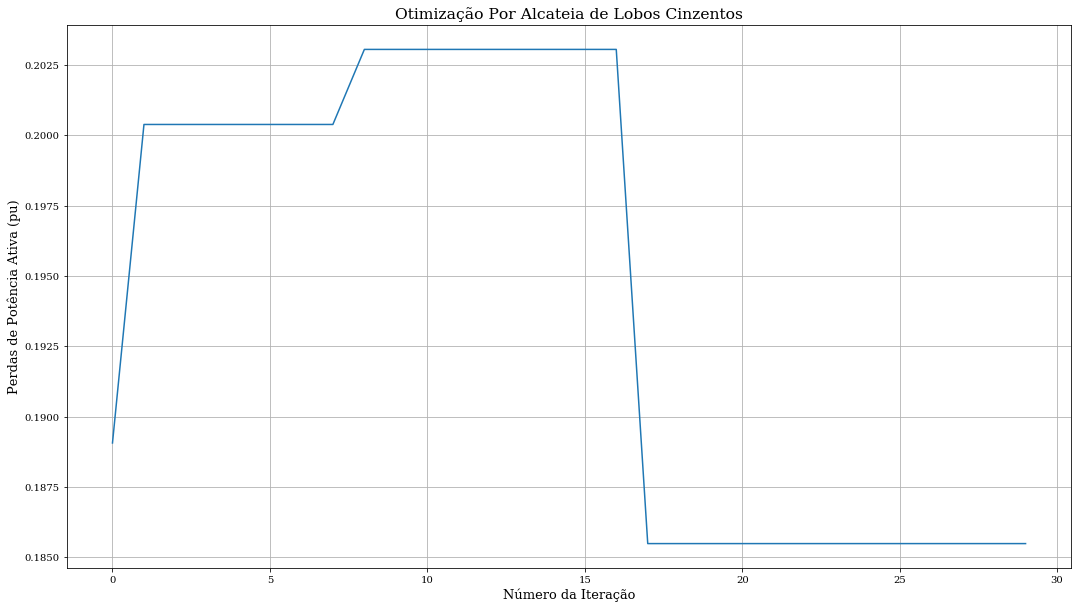

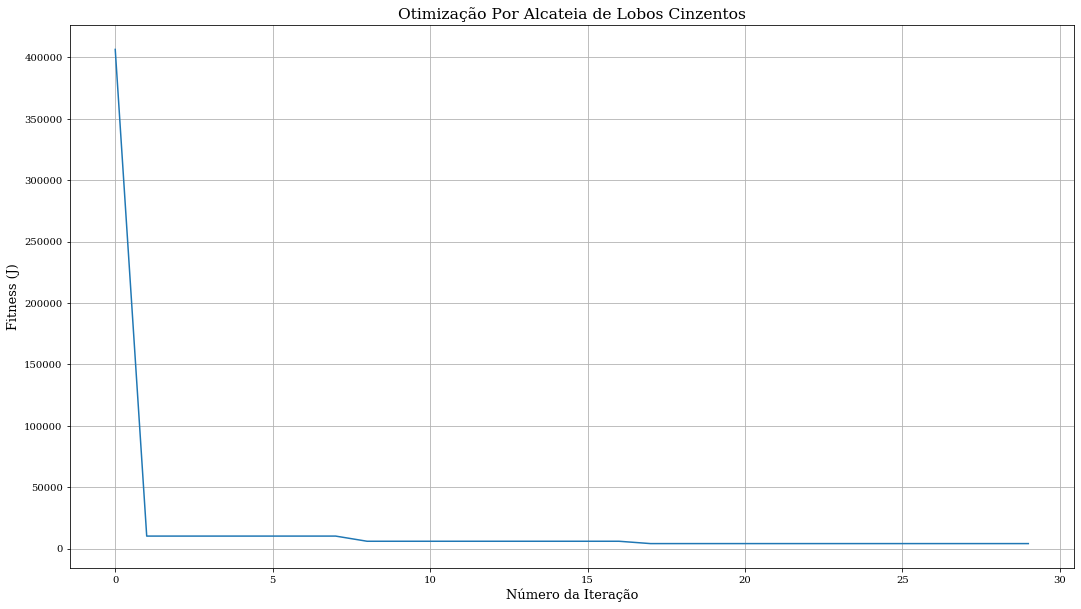

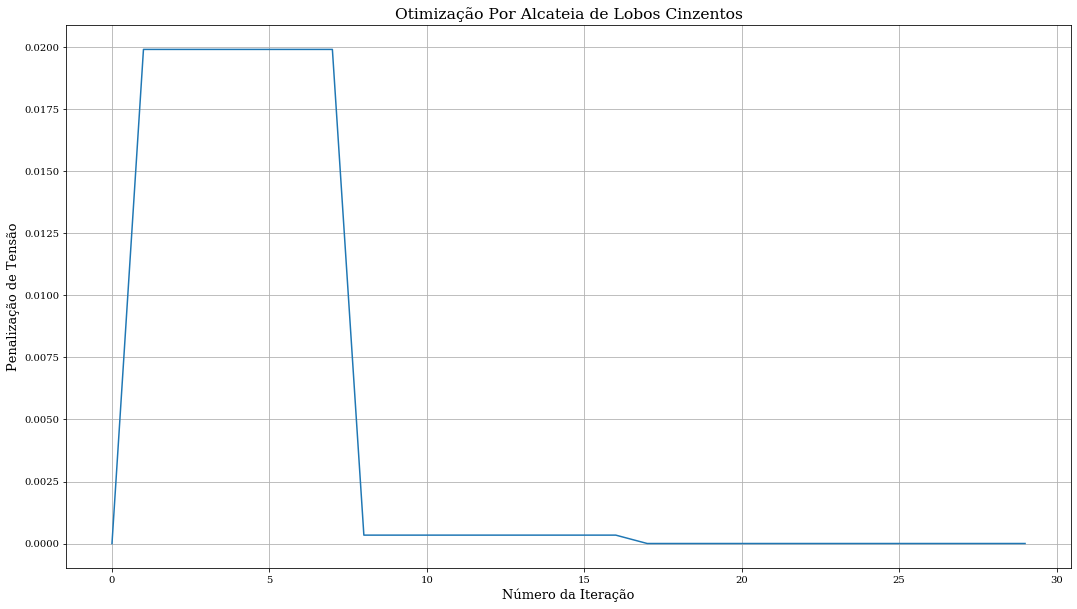

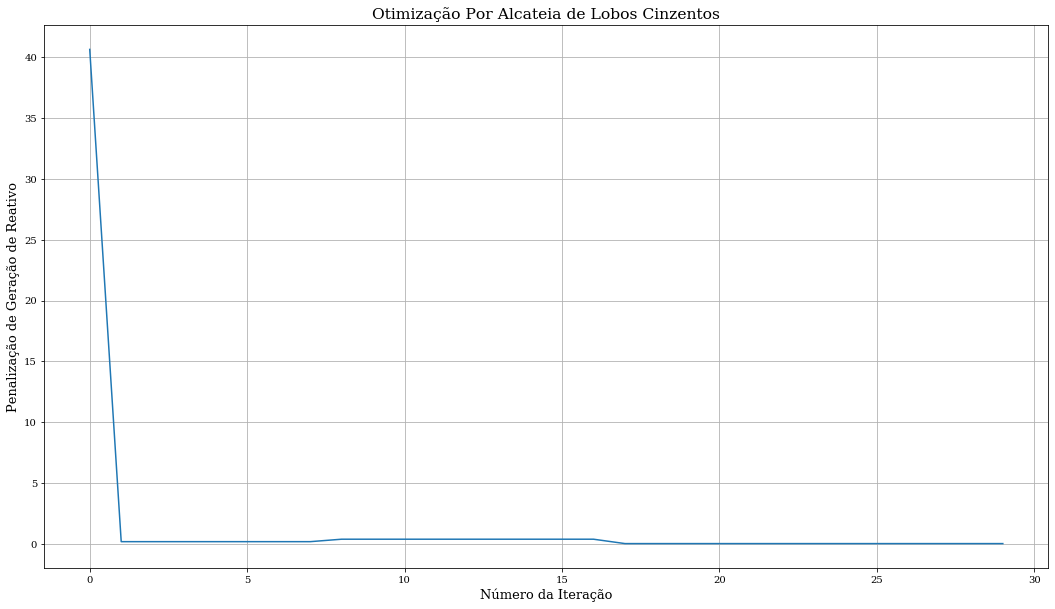

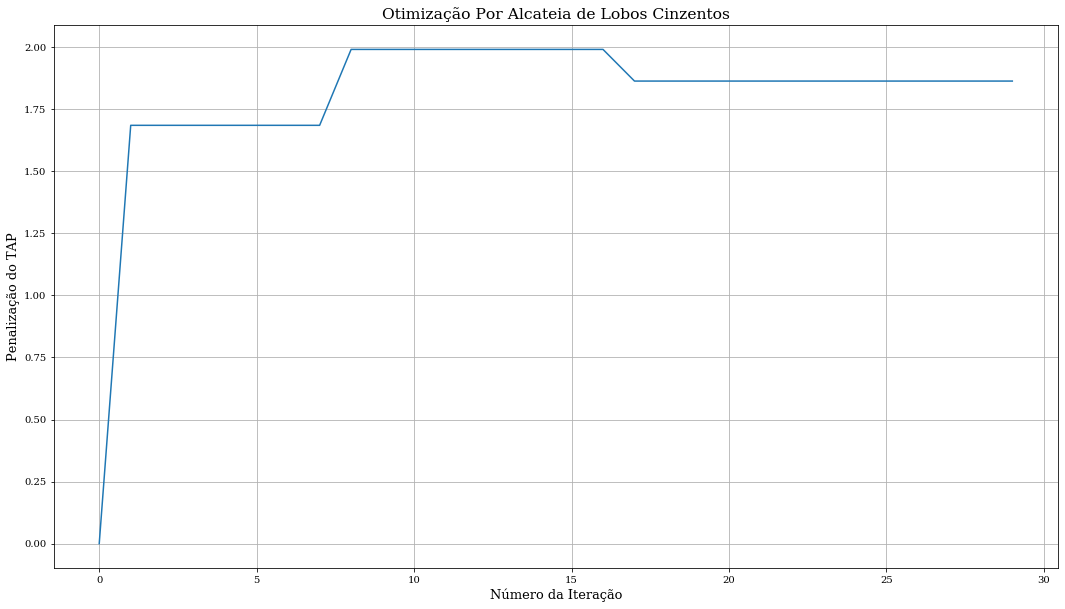

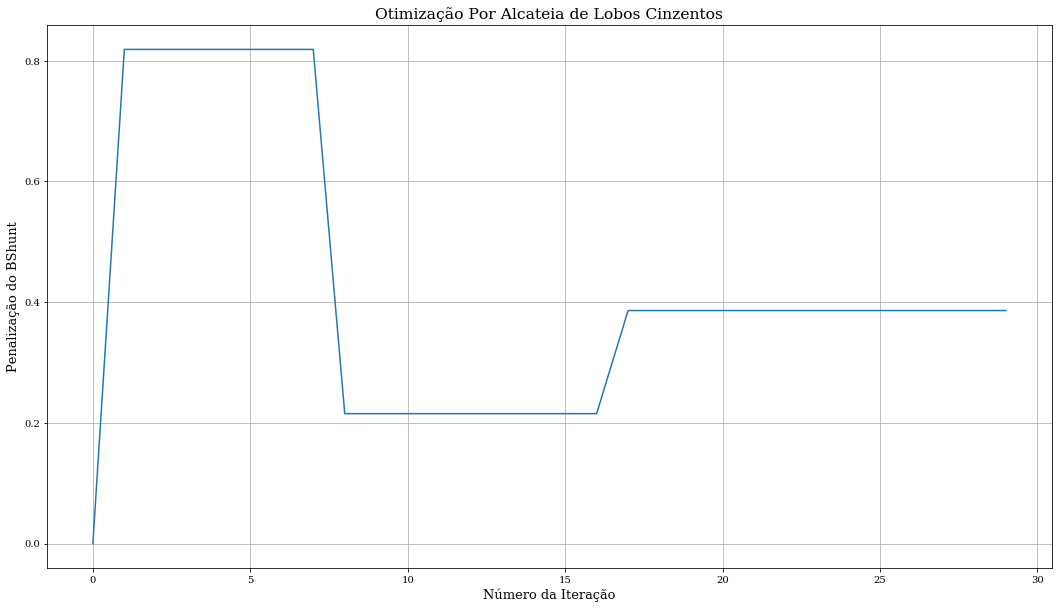

In [91]:
penalizacao_v = 10000
penalizacao_q = 10000
penalizacao_tap = 10000
penalizacao_bshunt = 10000

max_iter = 30

n_wolfs = 15

sistema = sep30

if len(sistema.bus) == 14:

    v_inicial = inicial_14

if len(sistema.bus) == 30:

    v_inicial = inicial_30
    

if len(sistema.bus) == 118:

    v_inicial = inicial_118


if len(sistema.bus) == 300:

    v_inicial = inicial_300


   
j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,alcateias,lobo_alfa, lobo_beta, lobo_delta, elapsed = otimizacao_alcateia_de_lobos_cinzentos(sistema, penalizacao_v, penalizacao_q, penalizacao_tap, penalizacao_bshunt, max_iter, n_wolfs, valor_inicial=v_inicial,relatorio=True,inicial=True)



 
Melhor Global da Iteração: 0
Perdas (pu): 0.19782748481225607
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 51.96248873341128
Penalização do Tap: 1.8027669099355194e-25
Penalização do Bshunt: 1.4913823321149176e-26
Fitness: 519625.08516159764
Tempo:  0.32238006591796875
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 1
Perdas (pu): 0.19782748481225607
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 51.96248873341128
Penalização do Tap: 1.8027669099355194e-25
Penalização do Bshunt: 1.4913823321149176e-26
Fitness: 519625.08516159764
Tempo:  0.2729673385620117
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 2
Perdas (pu): 0.19782748481225607
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 51.96248873341128
Penalização do Tap: 1.8027669099355194e-25
Penalização do Bshunt: 1.491382332114

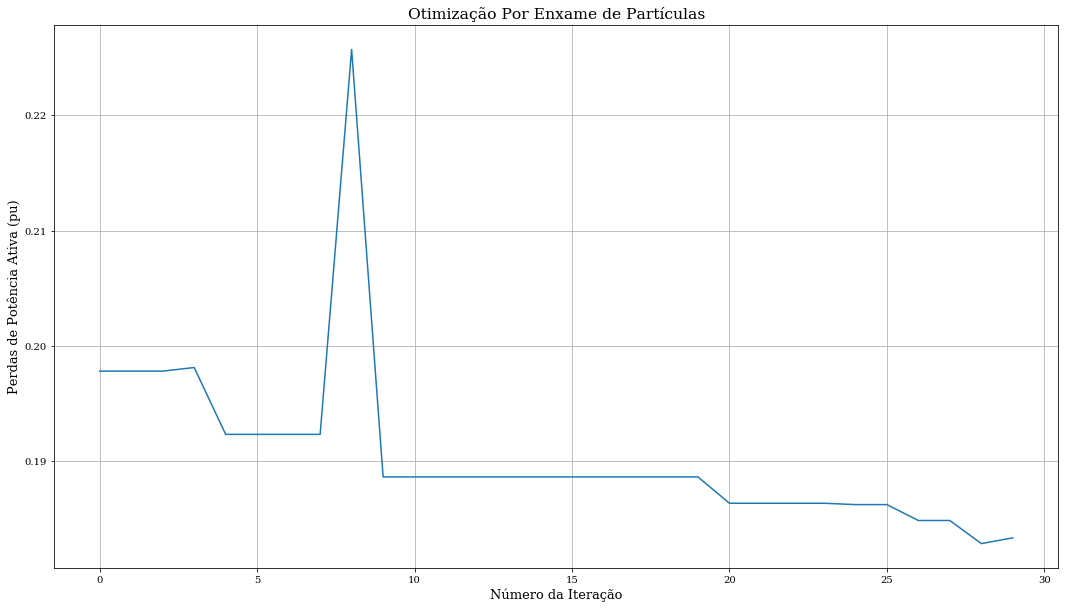

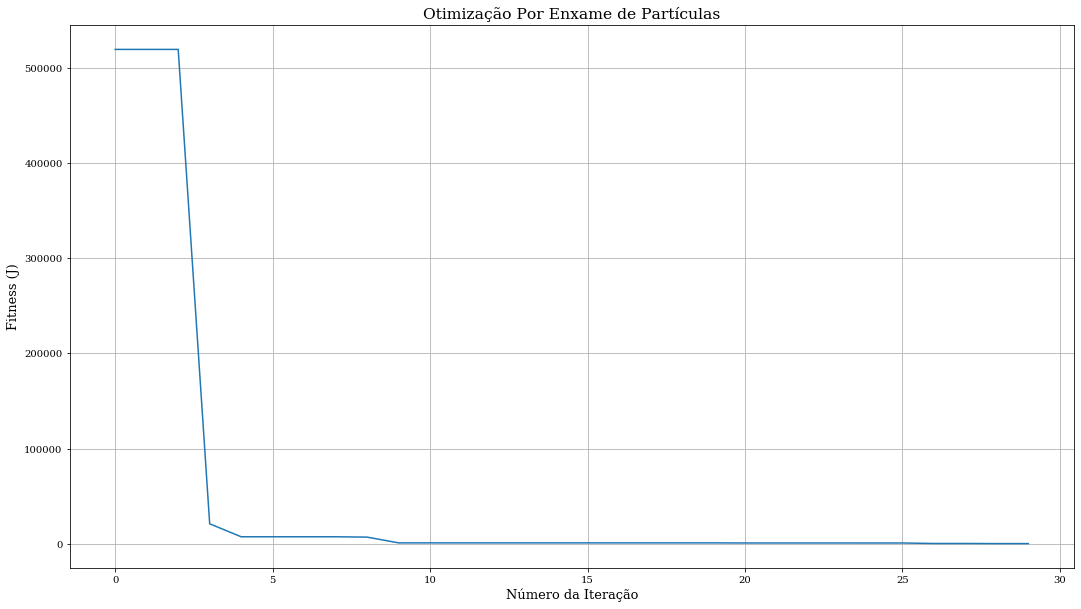

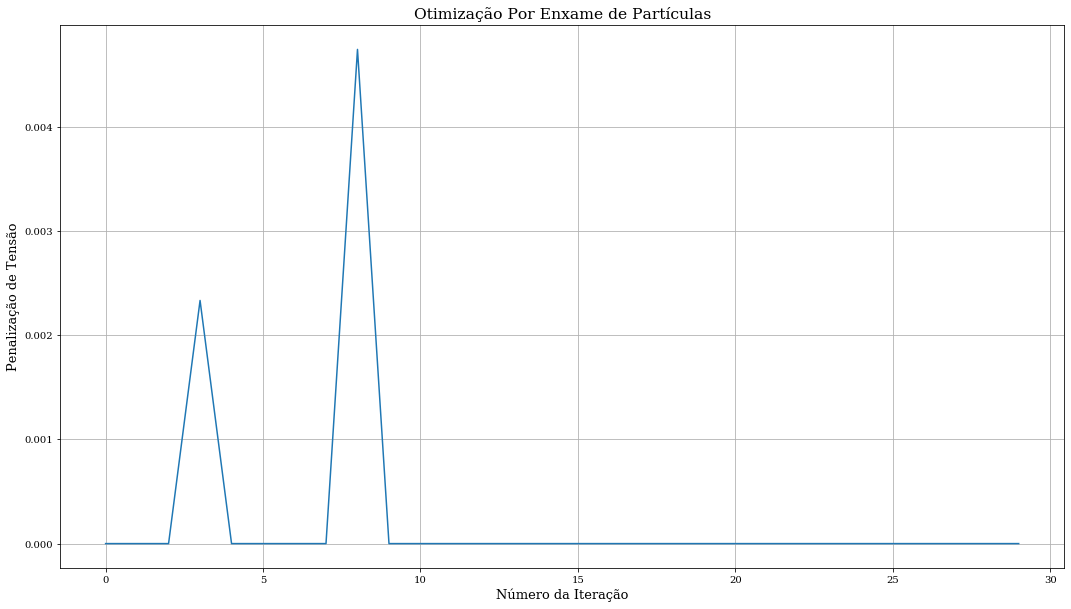

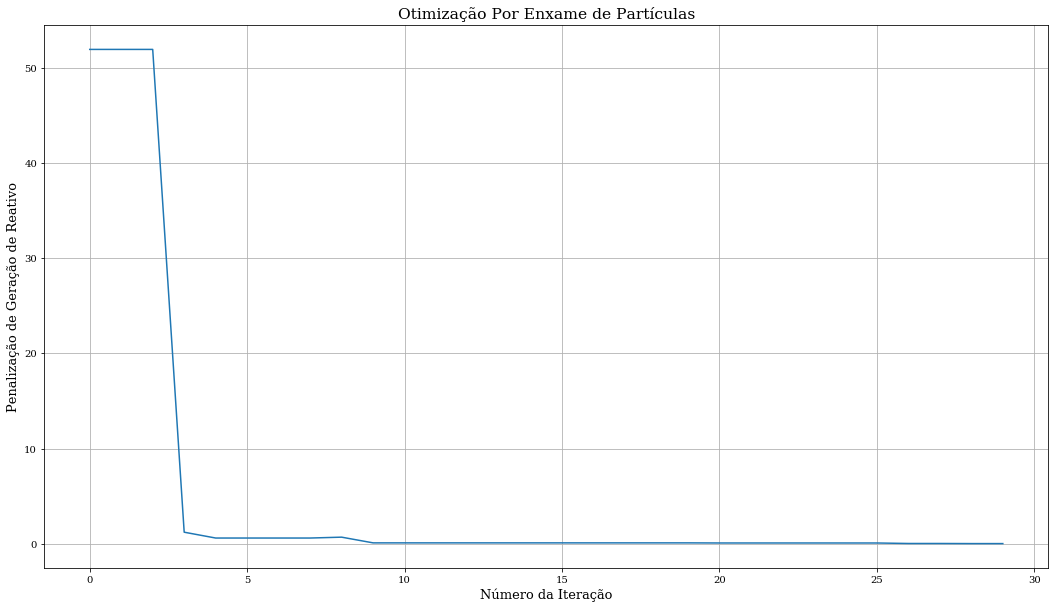

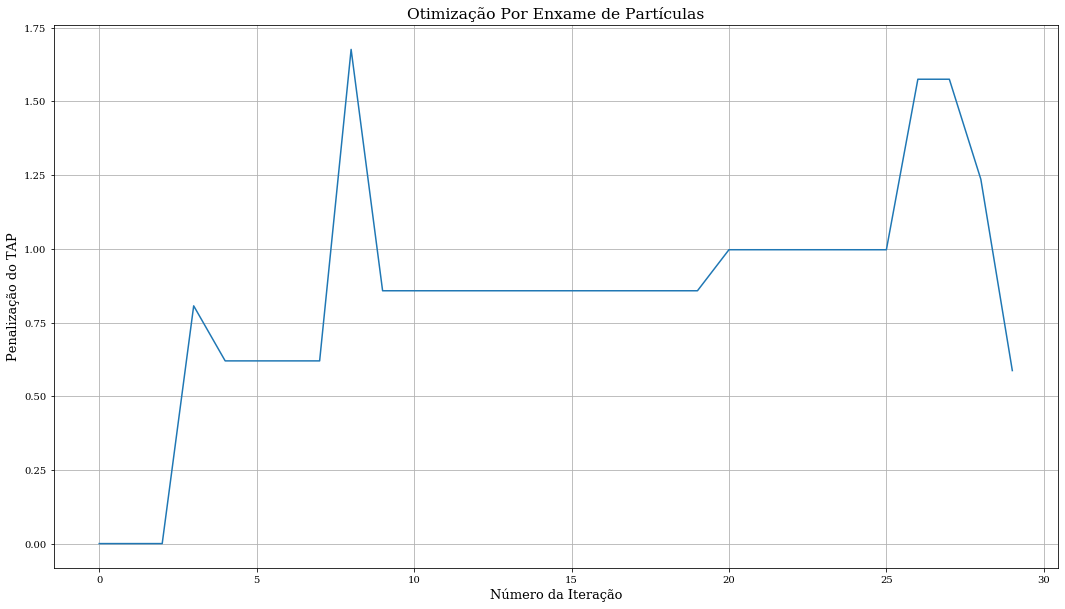

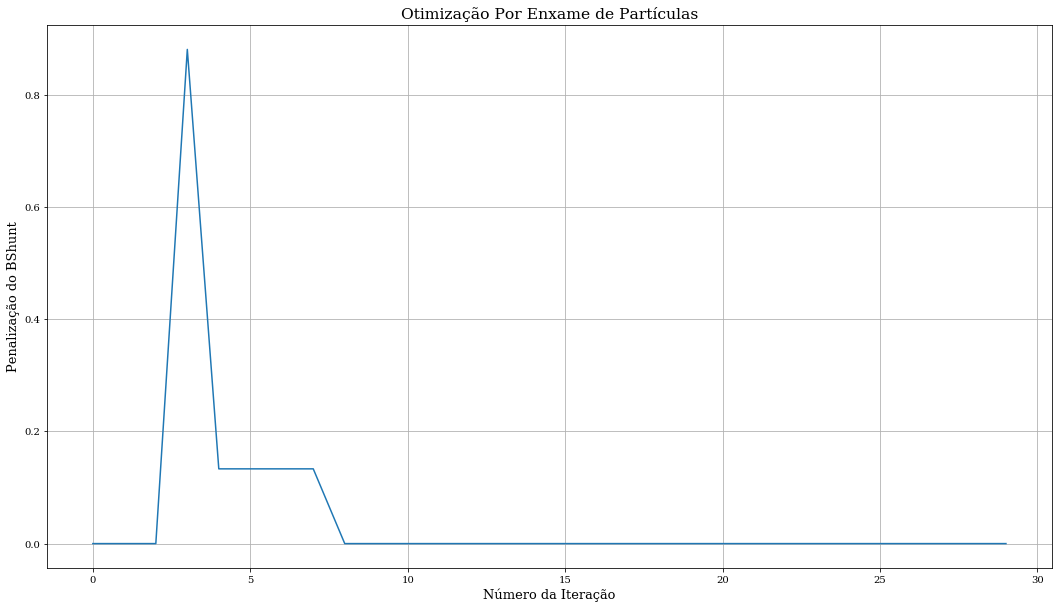

In [92]:
glob_30 = np.array([1.0251,0.9749,0.965,0.969,1.06,1.12,0.88,0.88,0.88,0.39,0.09,0,0,0,0,0,0])
glob_14 = np.array([1.0376,1.00956,1.05,1.02,1.12,1.12,0.88,0.39,0,0,0,0,0,0])


penalizacao_v = 10000
penalizacao_q = 10000
penalizacao_tap = 10000
penalizacao_bshunt = 10000

max_iter = 30

n_particles = 15

sistema = sep30

if len(sistema.bus) == 14:

    v_inicial = inicial_14

if len(sistema.bus) == 30:

    v_inicial = inicial_30
    

if len(sistema.bus) == 118:

    v_inicial = inicial_118


if len(sistema.bus) == 300:

    v_inicial = inicial_300

j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo = otimizacao_enxame_de_particulas(sistema, penalizacao_v, penalizacao_q, penalizacao_tap, penalizacao_bshunt, max_iter, n_particles, 2, 2, 0.1, valor_inicial = v_inicial,relatorio=True,inicial=True)

print(global_best)

In [165]:
print(lobo_alfa)

[9.41259755e-01 9.62572745e-01 9.58914416e-01 9.73138455e-01
 1.00097255e+00 9.57078977e-01 9.75777668e-01 9.84106014e-01
 9.72481190e-01 1.02634355e+00 9.83953329e-01 1.01032629e+00
 1.01009090e+00 1.00393799e+00 1.01468433e+00 1.01023333e+00
 1.00415264e+00 1.02639470e+00 1.03667429e+00 9.89647124e-01
 1.00783023e+00 9.95404565e-01 9.79790170e-01 9.85280989e-01
 9.67957468e-01 1.02404015e+00 1.00975643e+00 9.82042274e-01
 1.00627016e+00 1.02806276e+00 9.94085458e-01 1.01350314e+00
 1.03119084e+00 1.03001581e+00 1.00186335e+00 9.96994217e-01
 1.01329632e+00 1.03606751e+00 1.02322733e+00 9.57684421e-01
 1.01923451e+00 1.00988127e+00 1.02633712e+00 1.00777098e+00
 1.01771216e+00 9.91907671e-01 1.00086934e+00 1.00982960e+00
 1.04406862e+00 1.05288445e+00 1.05230522e+00 1.04709800e+00
 9.47341664e-01 1.09263067e+00 1.06118817e+00 9.49813749e-01
 9.68195022e-01 9.48392647e-01 1.07862770e+00 9.39102567e-01
 9.67536136e-01 9.10666521e-01 6.01817473e-02 1.90576019e-01
 1.50101982e-01 2.005726

In [ ]:
jota = np.zeros([50,50])
per = np.zeros([50,50])
penv = np.zeros([50,50])
peng = np.zeros([50,50])
penbsh = np.zeros([50,50])
tim = np.zeros([50,50])
pentap = np.zeros([50,50])
global_b = []

for i in range(50):
    
    penalizacao_v = 1000
    penalizacao_q = 1000
    penalizacao_tap = 0
    penalizacao_bshunt = 0

    max_iter = 50

    n_particles = 30

    sistema = sep118

    if len(sistema.bus) == 14:

        v_inicial = inicial_14

    if len(sistema.bus) == 30:

        v_inicial = inicial_30


    if len(sistema.bus) == 118:

        v_inicial = inicial_118


    if len(sistema.bus) == 300:

        v_inicial = inicial_300

    j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo = otimizacao_enxame_de_particulas2(sistema, penalizacao_v, penalizacao_q, penalizacao_tap, penalizacao_bshunt, max_iter, n_particles, 2, 2, 0.1, valor_inicial= v_inicial,relatorio=False,inicial=True)


    jota[i,:] = j
    per[i,:] = perdas
    penv[i,:] = pen_v
    peng[i,:] = pen_gq
    penbsh[i,:] = pen_bsh
    tim[i,:] = tempo
    pentap[i,:] = pen_tap
    global_b.append(global_best)
    
    print('Iteração: ')
    print(i)




In [ ]:
jota = np.zeros([50,50])
per = np.zeros([50,50])
penv = np.zeros([50,50])
peng = np.zeros([50,50])
penbsh = np.zeros([50,50])
tim = np.zeros([50,50])
pentap = np.zeros([50,50])
global_b = []

for i in range(50):
    
    penalizacao_v = 1000
    penalizacao_q = 1000
    penalizacao_tap = 0
    penalizacao_bshunt = 0

    max_iter = 109

    n_particles = 50
    
    sistema = sep118

    if len(sistema.bus) == 14:

        v_inicial = inicial_14

    if len(sistema.bus) == 30:

        v_inicial = inicial_30


    if len(sistema.bus) == 118:

        v_inicial = inicial_118


    if len(sistema.bus) == 300:

        v_inicial = inicial_300

    j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,alcateias,lobo_alfa, lobo_beta, lobo_delta, elapsed = otimizacao_alcateia_de_lobos_cinzentos2(sistema, penalizacao_v, penalizacao_q, penalizacao_tap, penalizacao_bshunt, max_iter, n_wolfs, valor_inicial=v_inicial,relatorio=False,inicial=True)


    jota[i,:] = j
    per[i,:] = perdas
    penv[i,:] = pen_v
    peng[i,:] = pen_gq
    penbsh[i,:] = pen_bsh
    tim[i,:] = tempo
    pentap[i,:] = pen_tap
    global_b.append(lobo_alfa)
    
    print('Iteração: ')
    print(i)






In [ ]:
jota300 = np.zeros([50,100])
per300 = np.zeros([50,100])
penv300 = np.zeros([50,100])
peng300 = np.zeros([50,100])
penbsh300 = np.zeros([50,100])
tim300 = np.zeros([50,100])
pentap300 = np.zeros([50,100])
global_b300 = []

for i in range(50):
    
    j, perdas, pen_v, pen_gq, pen_tap, pen_bsh, global_best, tempo = otimizacao_enxame_de_particulas(sep300, 1000, 1000, 10, 10, 100, 100, 2, 2,0.1, valor_inicial=glob_30,relatorio=False,inicial=False)

    jota300[i,:] = j
    per300[i,:] = perdas
    penv300[i,:] = pen_v
    peng300[i,:] = pen_gq
    penbsh300[i,:] = pen_bsh
    tim300[i,:] = tempo
    pentap300[i,:] = pen_tap
    global_b300.append(global_best)
    
    print('Iteração: ')
    print(i)
    

In [ ]:
plt.plot(np.median(per,axis=0),label='Mediana',color='blue')
plt.plot(np.mean(per,axis=0),label='Média',color='red')
plt.fill_between(np.arange(30), np.mean(per,axis=0) + np.std(per,axis=0), np.mean(per,axis=0) - np.std(per,axis=0),alpha=0.1)
plt.fill_between(np.arange(30), np.median(per,axis=0) + np.std(per,axis=0), np.median(per,axis=0) - np.std(per,axis=0),alpha=0.1)

plt.legend()
plt.grid()

    
plt.title('IEEE 30: PSO (50 EXECUÇÕES / 30 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Média e Mediana das Perdas')

In [ ]:
plt.style.use('seaborn-white')

for i in range(len(jota)):
    plt.plot(jota[i,:])
    
plt.title('IEEE 30: PSO (50 EXECUÇÕES / 30 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Fitness')

plt.grid()
plt.show()

In [ ]:
plt.plot(np.median(jota,axis=0),label='Mediana',color='blue')
plt.plot(np.mean(jota,axis=0),label='Média',color='red')
plt.fill_between(np.arange(30), np.mean(jota,axis=0) + np.std(jota,axis=0), np.mean(jota,axis=0) - np.std(jota,axis=0),alpha=0.1)
plt.fill_between(np.arange(30), np.median(jota,axis=0) + np.std(jota,axis=0), np.median(jota,axis=0) - np.std(jota,axis=0),alpha=0.1)

plt.legend()
plt.grid()

    
plt.title('IEEE 30: GWO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Média e Mediana do Fitness')

In [ ]:
plt.style.use('seaborn-white')

for i in range(len(per)):
    plt.plot(per[i,:])
    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Perdas')

plt.grid()
plt.show()

In [ ]:
plt.plot(np.median(per,axis=0),label='Mediana',color='blue')
plt.plot(np.mean(per,axis=0),label='Média',color='red')
plt.fill_between(np.arange(100), np.mean(per,axis=0) + np.std(per,axis=0), np.mean(per,axis=0) - np.std(per,axis=0),alpha=0.1)
plt.fill_between(np.arange(100), np.median(per,axis=0) + np.std(per,axis=0), np.median(per,axis=0) - np.std(per,axis=0),alpha=0.1)

plt.legend()
plt.grid()

    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Média e Mediana das Perdas')

In [ ]:
plt.style.use('seaborn-white')

for i in range(len(penv)):
    plt.plot(penv[i,:])
    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Penalização de Tensão')

plt.grid()
plt.show()

In [ ]:
plt.plot(np.median(penv,axis=0),label='Mediana',color='blue')
plt.plot(np.mean(penv,axis=0),label='Média',color='red')
plt.fill_between(np.arange(100), np.mean(penv,axis=0) + np.std(penv,axis=0), np.mean(penv,axis=0) - np.std(penv,axis=0),alpha=0.1)
plt.fill_between(np.arange(100), np.median(penv,axis=0) + np.std(penv,axis=0), np.median(penv,axis=0) - np.std(penv,axis=0),alpha=0.1)

plt.legend()
plt.grid()

    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Média e Mediana da Penalização de Tensão')

In [ ]:
plt.plot(np.median(peng,axis=0),label='Mediana',color='blue')
plt.plot(np.mean(peng,axis=0),label='Média',color='red')
plt.fill_between(np.arange(100), np.mean(peng,axis=0) + np.std(peng,axis=0), np.mean(peng,axis=0) - np.std(peng,axis=0),alpha=0.1)
plt.fill_between(np.arange(100), np.median(peng,axis=0) + np.std(peng,axis=0), np.median(peng,axis=0) - np.std(peng,axis=0),alpha=0.1)

plt.legend()
plt.grid()

    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Média e Mediana da Penalização de Geração')

In [ ]:
plt.style.use('seaborn-white')

for i in range(len(peng)):
    plt.plot(peng[i,:])
    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Penalização de Geração')

plt.grid()
plt.show()

In [ ]:
plt.style.use('seaborn-white')

for i in range(len(penbsh)):
    plt.plot(penbsh[i,:])
    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Penalização Bshunt')

plt.grid()
plt.show()

In [ ]:
plt.plot(np.median(penbsh,axis=0),label='Mediana',color='blue')
plt.plot(np.mean(penbsh,axis=0),label='Média',color='red')
plt.fill_between(np.arange(100), np.mean(penbsh,axis=0) + np.std(penbsh,axis=0), np.mean(penbsh,axis=0) - np.std(penbsh,axis=0),alpha=0.1)
plt.fill_between(np.arange(100), np.median(penbsh,axis=0) + np.std(penbsh,axis=0), np.median(penbsh,axis=0) - np.std(penbsh,axis=0),alpha=0.1)

plt.legend()
plt.grid()

    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Média e Mediana da Penalização Bshunt')

In [ ]:
plt.style.use('seaborn-white')

for i in range(len(pentap)):
    plt.plot(pentap[i,:])
    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Penalização do TAP')

plt.grid()
plt.show()

In [ ]:
plt.plot(np.median(pentap,axis=0),label='Mediana',color='blue')
plt.plot(np.mean(pentap,axis=0),label='Média',color='red')
plt.fill_between(np.arange(100), np.mean(pentap,axis=0) + np.std(pentap,axis=0), np.mean(pentap,axis=0) - np.std(pentap,axis=0),alpha=0.1)
plt.fill_between(np.arange(100), np.median(pentap,axis=0) + np.std(pentap,axis=0), np.median(pentap,axis=0) - np.std(pentap,axis=0),alpha=0.1)

plt.legend()
plt.grid()

    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES)')
plt.xlabel('Iterações')
plt.ylabel('Média e Mediana da Penalização de Geração')

In [ ]:
pena = jota[:,-1] - per[:,-1]

plt.hist(pena)
plt.grid()

    
plt.title('IEEE 118: PSO (50 EXECUÇÕES / 100 ITERAÇÕES) Histograma de Frequência')
plt.xlabel('Somatório das Penalizações')
plt.ylabel('Frequências')

In [ ]:
len(pena[pena<0.001])

In [ ]:
np.argmin(jota[:,-1])



In [ ]:
init

In [ ]:
validacao(sep118,lobo_alfa)

In [ ]:
coleta_dados_vbus(sep118,relatorio=True) #
#[ 0.98798055  1.04575647  1.00950339  1.04036462  1.02704805  1.00893791
#  1.00858986  1.0047482   1.00063139  1.0582289   1.03505602  1.03624014
#  1.03453512  1.04453844  1.03849237  1.02522917  1.02045642  1.05513686
#  1.05194047  1.05526188  1.03000704  1.03018907  1.02471901  1.02548059
#  1.02621844  1.00970307  1.01223421  1.04322709  1.04918653  1.02507344
#  0.95218199  1.02663763  1.00753379  0.99740693  1.04214262  1.06
#  1.04121107  1.02544117  1.0570769   0.9448963   1.03090518  1.03910908
#  1.03006572  1.04678375  1.04564313  1.03527807  1.0351827   1.03107075
#  1.03075305  1.04996945  0.9994698   1.04178034  1.02796504  1.025
#  1.00625     1.00625     0.99375     1.          1.          1.01875
#  0.96875     1.1         0.          0.07       -0.2         0.1
#  0.1         0.1         0.15        0.12        0.1         0.1
#  0.2         0.2         0.07        0.2  ]



#Sistema Simulado Para a Solução:

#[ 0.97110395  0.99301498  0.99341324  0.98897927  1.01125619  0.99420506
#  0.9786915   0.98293981  0.97761344  0.98380786  1.00963681  0.98948012
#  1.01182371  0.97741193  0.99793626  0.98490286  0.97902733  0.98614388
#  0.99949246  0.98722291  1.01493092  1.00423279  0.99958708  1.00036178
#  1.00328008  1.01783387  1.01326557  1.01327623  1.0187207   1.00724629
#  0.9942187   0.99986967  0.98480014  0.96191013  0.99234626  0.99629653
#  0.9802574   0.99601756  0.99116616  0.97520822  0.9943048   0.98149934
#  0.97362485  0.9933737   0.98631997  0.97837746  0.98311451  0.9879563
#  1.01136539  1.02460243  1.01716511  0.99922554  0.9750293   0.95
#  0.975       0.9625      1.03125     0.96875     0.9875      0.99375
#  0.99375     0.9625      0.          0.07       -0.2         0.1
#  0.          0.          0.          0.12        0.1         0.2
#  0.2         0.2         0.13        0.14      ]

In [ ]:
coleta_dados_gen(sep118,relatorio=True)

In [ ]:
coleta_dados_trafo(sep118,relatorio=True)

In [ ]:
temp = 0

tempo_acumulado = np.zeros(len(tempo))

for i in range(len(tempo)):
    
    if i == 0:
        
        tempo_acumulado[i] = tempo[i]
    
    else:
        
    
        tempo_acumulado[i] = tempo_acumulado[i-1] + tempo[i]
    

In [ ]:
plt.plot(tempo_acumulado)
plt.grid()

In [ ]:
np.mean(tempo)

In [ ]:
np.std(tempo)

In [95]:
def discreto_bshunt(grupo,n_tap,n_vgen,n_bshunt,sep):
    
    b = grupo[n_tap+n_vgen:n_tap+n_vgen+n_bshunt]
    
    bsh,bus=coleta_dados_bshunt(sep)
    
    penal = 0
    
    discretiza = []
    
    i = 0

    bs = []

    for i in range(len(bsh)):
    
        bs.append(np.array(bsh[i]))
    
    i = 0
    
    for c in bs:
                
        discretiza.append(c[np.argmin(np.abs(c-b[i]))])
        
        i=i+1    
        
    
    return discretiza    
    

In [96]:
def discreto_tap(grupo,n_tap,n_vgen,n_bshunt,sep):
    
    b = grupo[n_vgen:n_vgen+n_tap]
    
    ref = np.arange(0.9,1.1,0.00625)
    
    discretizatap = np.zeros(len(b))
    
    i = 0

    
    for i in range(len(b)):
        
        discretizatap[i]=(ref[np.argmin(np.abs(ref-b[i]))])
                   
    return discretizatap
    
    

In [135]:
def otimizacao_enxame_de_particulas2(sep, zeta, psi, sigma, omega, max_iter, n_particles,c1,c2,v_amp,valor_inicial,relatorio=True,inicial=True):
        
    enxame_fit = cria_enxame(sep,n_particles)
    
    if inicial == True:
        
        enxame_fit[0,:]=valor_inicial     
    
    if len(sep.bus) == 14:
        
        n_vgen = 4
        n_tap = 3
        n_bshunt = 1
    
    if len(sep.bus) == 30:
        
        n_vgen = 5
        n_tap = 4
        n_bshunt = 2
        
    
    if len(sep.bus) == 118:
        
        n_vgen = 53
        n_tap = 9
        n_bshunt = 14
        
        
    if len(sep.bus) == 300:
        
        n_vgen = 68
        n_tap = 62
        n_bshunt = 29
    
    
    w_max=0.9
    
    w_min=0.4
    
    
    j = []
    
    
    tempo = []
        
    perdas = []
    
    pen_v = []
    
    pen_gq = []
    
    pen_tap = []
    
    pen_bsh = []

    
    v_lim_superior = np.repeat(sep.bus['max_vm_pu'][0], len(sep.gen))
    
    v_lim_inferior = np.repeat(sep.bus['min_vm_pu'][0], len(sep.gen))
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps = coleta_dados_trafo(sep,relatorio=False)
    
    tap_max = np.repeat(valores_taps[-1], len(tap_pos))
    
    tap_min = np.repeat(valores_taps[0], len(tap_pos))
    
    bsh,b=coleta_dados_bshunt(sep)

    bsh_max=[]
    
    bsh_min=[]
    

    for bs in bsh:
        bsh_max.append([np.max(bs)])
        bsh_min.append([np.min(bs)])


    maximo = np.expand_dims(np.concatenate((v_lim_superior, tap_max, bsh_max), axis = None), 0)
    minimo = np.expand_dims(np.concatenate((v_lim_inferior, tap_min, bsh_min), axis = None), 0)
     
    
    lim_sup = np.tile(maximo, (n_particles,1))
    lim_inf = np.tile(minimo, (n_particles,1))
    
    v_anterior = v_amp*cria_enxame(sep,n_particles)

    for i in range(0,max_iter):
        
        start = time.time()
        
        mu, sigma = 0.5, 0.152 # mean and standard deviation

        r1 = np.random.normal(mu, sigma, size = (n_particles,enxame_fit.shape[1]))
        r2 = np.random.normal(mu, sigma, size = (n_particles,enxame_fit.shape[1]))
        
        #r1 = np.random.random_sample(size = (n_particles,enxame_fit.shape[1]))
        
        #r2 = np.random.random_sample(size = (n_particles,enxame_fit.shape[1]))
    
       
        enxame_fit = fluxo_de_pot(enxame_fit,sep)
        
        enxame_fit = fitness(enxame_fit,zeta,psi,sigma,omega)

        if i==0:
            
            best_particles = enxame_fit.copy()

            global_best = best_particles[np.argsort(best_particles[:, -1])][0,:].copy()
            
            global_matriz = np.tile(global_best, (n_particles,1))
        
            
           
        for t in range(0,n_particles):
                
            if enxame_fit[t,-1] < best_particles[t,-1]:
                    
                best_particles[t,:] = enxame_fit[t,:].copy()
                    

        global_best = best_particles[np.argsort(best_particles[:, -1])][0,:].copy()
            
        global_matriz = np.tile(global_best, (n_particles,1))   
            
        enxame_fit_anterior = enxame_fit.copy()
        
        w_novo = w_max-(w_max-w_min)*(i+1)/max_iter
       
        v_novo = np.multiply(w_novo,v_anterior.copy()) + c1*np.multiply(r1,(best_particles.copy()-enxame_fit.copy())) + c2*np.multiply(r2,(global_matriz.copy()-enxame_fit.copy()))
        
        enxame_fit_novo = enxame_fit_anterior  + v_novo
        
        v_anterior = v_novo.copy()
        
        
        for linha in range(n_particles):
          
            enxame_fit_novo[linha][n_vgen:n_vgen+n_tap] = discreto_tap(enxame_fit_novo[linha],n_tap,n_vgen,n_bshunt,sep)
            enxame_fit_novo[linha][n_vgen+n_tap:n_vgen+n_tap+n_bshunt] = discreto_bshunt(enxame_fit_novo[linha],n_tap,n_vgen,n_bshunt,sep)
            

        enxame_estat = enxame_fit_novo[:,-6:]

        enxame_fit = np.concatenate(( np.clip(enxame_fit_novo[:,0:-6], a_min = lim_inf, a_max = lim_sup, out = enxame_fit_novo[:,0:-6]),enxame_estat),axis=1)   

        
        end = time.time()

        elapsed = end - start

        j.append(global_best[-1])

        perdas.append(global_best[-6])

        pen_v.append(global_best[-5])

        pen_gq.append(global_best[-4])

        pen_tap.append(global_best[-3])

        pen_bsh.append(global_best[-2])
        
        tempo.append(elapsed)
      

        if relatorio == True:
            
            print(' ')

            print('Melhor Global da Iteração:',i)

            print('Perdas (pu):', global_best[-6])

            print('Penalização de Tensão:', global_best[-5])

            print('Penalização de Geração de Reativo:', global_best[-4])

            print('Penalização do Tap:', global_best[-3])

            print('Penalização do Bshunt:', global_best[-2])

            print('Fitness:', global_best[-1])
            
            print('Tempo: ', elapsed)

            print(' ')

            print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
            
            
    
    if relatorio == True:
        
            plt.figure(figsize=(18,10))
            plt.plot(perdas)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Perdas de Potência Ativa (pu)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(j)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Fitness (J)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_v)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização de Tensão')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_gq)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização de Geração de Reativo')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_tap)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização do TAP')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_bsh)
            plt.grid()
            plt.title('Otimização Por Enxame de Partículas')
            plt.ylabel('Penalização do BShunt')
            plt.xlabel('Número da Iteração')
                       
            
    return j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo

      

 
Melhor Global da Iteração: 0
Perdas (pu): 0.18328278445344726
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.07741429338978555
Penalização do Tap: 9.026071222453238e-26
Penalização do Bshunt: 9.791376584590638e-27
Fitness: 774.3262166823416
Tempo:  0.3437919616699219
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 1
Perdas (pu): 0.18328278445344726
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.07741429338978555
Penalização do Tap: 9.026071222453238e-26
Penalização do Bshunt: 9.791376584590638e-27
Fitness: 774.3262166823416
Tempo:  0.3076009750366211
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 2
Perdas (pu): 0.18328278445344726
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.07741429338978555
Penalização do Tap: 9.026071222453238e-26
Penalização do Bshunt: 9.79137658459063

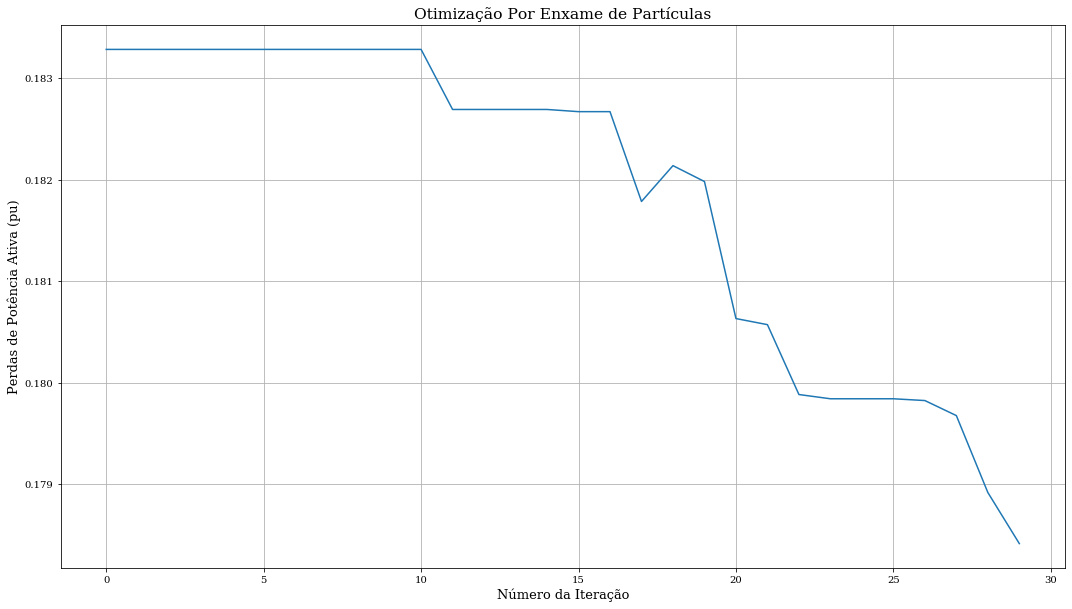

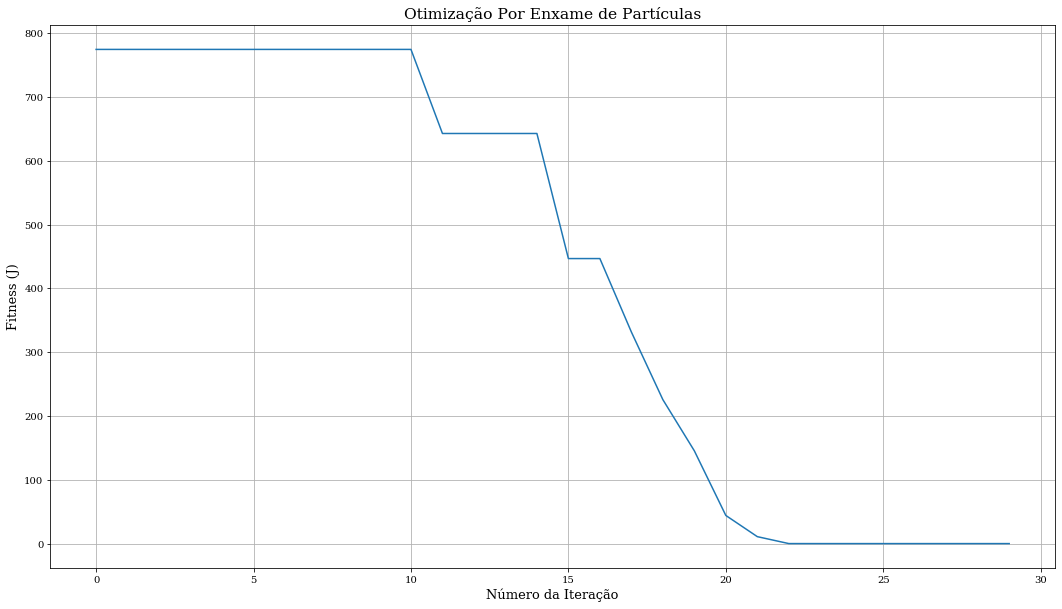

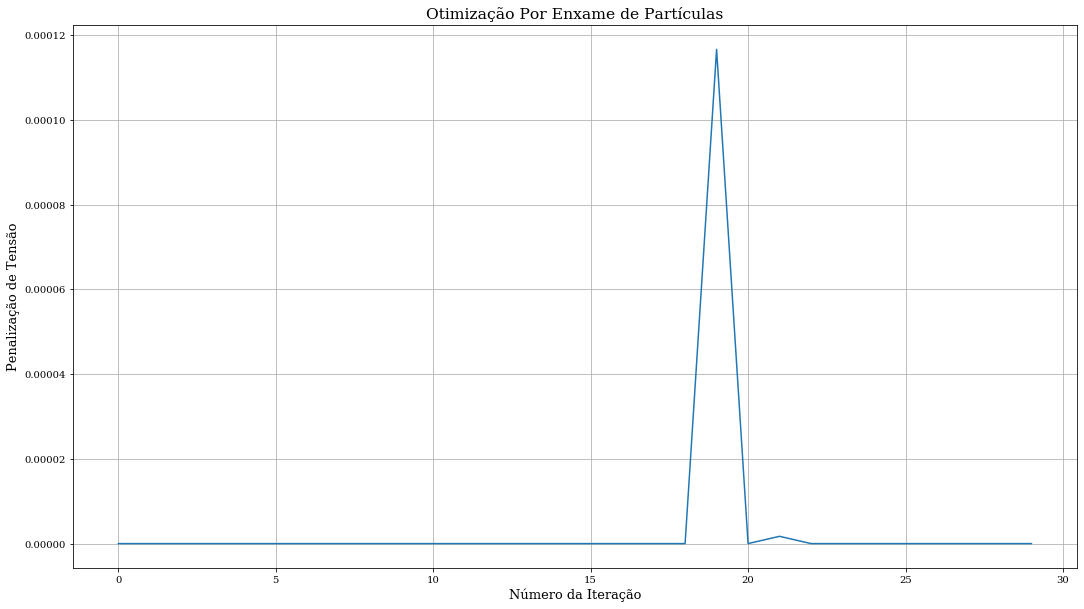

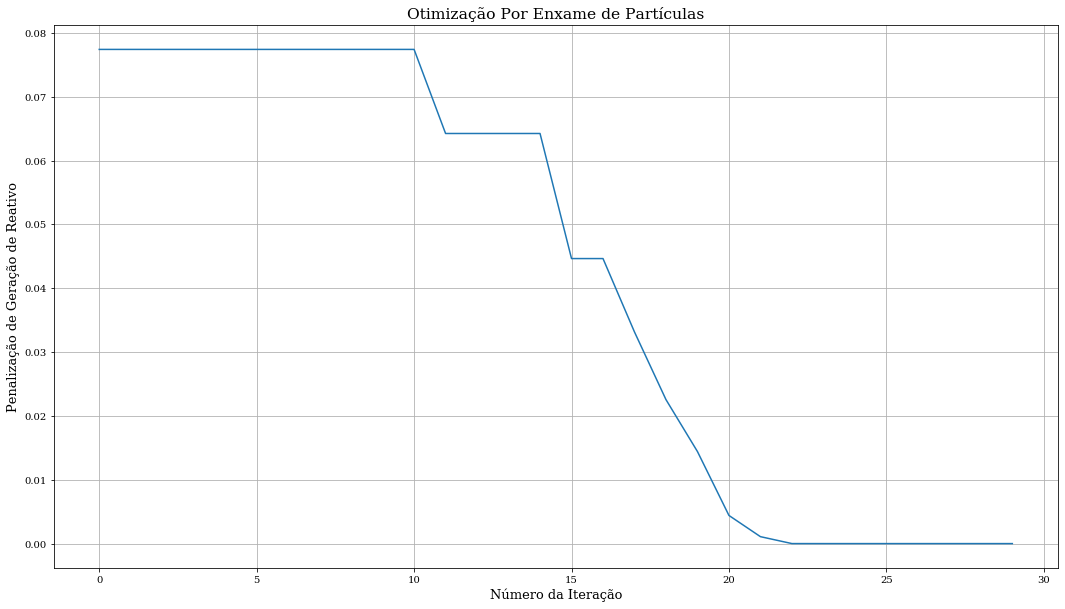

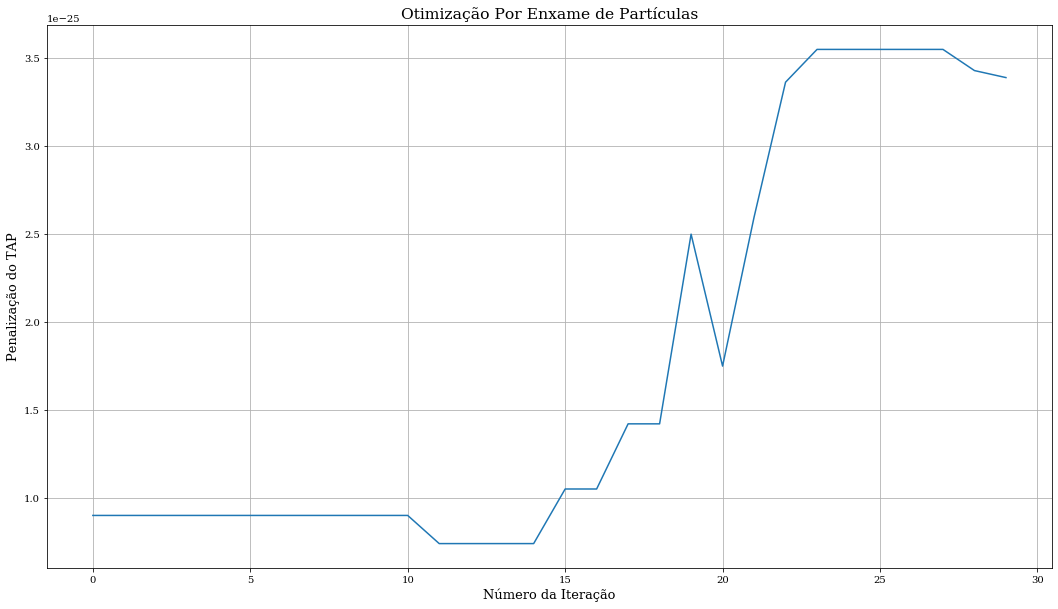

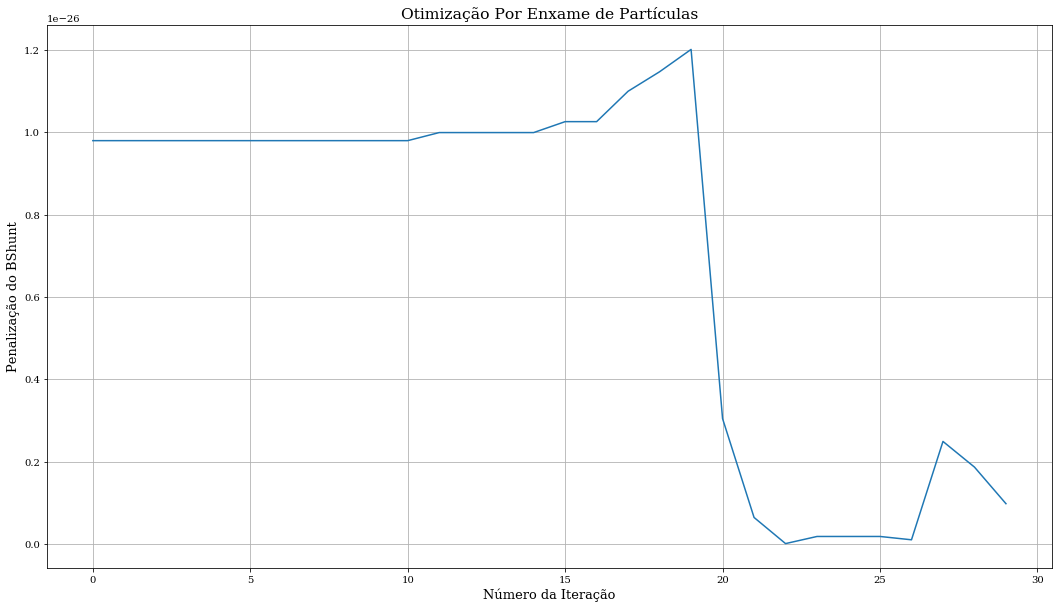

In [145]:
glob_30 = np.array([1.0251,0.9749,0.965,0.969,1.06,1.12,0.88,0.88,0.88,0.39,0.09,0,0,0,0,0,0])
glob_14 = np.array([1.0376,1.00956,1.05,1.02,1.12,1.12,0.88,0.39,0,0,0,0,0,0])


penalizacao_v = 10000
penalizacao_q = 10000
penalizacao_tap = 0
penalizacao_bshunt = 0

max_iter = 30

n_particles = 15

sistema = sep30

if len(sistema.bus) == 14:

    v_inicial = inicial_14

if len(sistema.bus) == 30:

    v_inicial = inicial_30
    

if len(sistema.bus) == 118:

    v_inicial = inicial_118

if len(sistema.bus) == 300:

    v_inicial = inicial_300

j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo = otimizacao_enxame_de_particulas2(sistema, penalizacao_v, penalizacao_q, penalizacao_tap, penalizacao_bshunt, max_iter, n_particles, 2, 2, 0.1, valor_inicial = v_inicial,relatorio=True,inicial=True)

print(global_best)

In [146]:
def otimizacao_alcateia_de_lobos_cinzentos2(sep, zeta, psi, sigma, omega, max_iter, n_lobos,valor_inicial,relatorio=True,inicial=True):
        
    alcateia_fit = cria_alcateia(sep,n_lobos)

    if inicial == True:
        
        alcateia_fit[0,:]=valor_inicial
        
    if len(sep.bus) == 14:
        
        n_vgen = 4
        n_tap = 3
        n_bshunt = 1
    
    if len(sep.bus) == 30:
        
        n_vgen = 5
        n_tap = 4
        n_bshunt = 2
        
    
    if len(sep.bus) == 118:
        
        n_vgen = 53
        n_tap = 9
        n_bshunt = 14
        
        
    if len(sep.bus) == 300:
        
        n_vgen = 68
        n_tap = 62
        n_bshunt = 29
    
    
    j = []
    
    perdas = []
    
    tempo = []
    
    pen_v = []
    
    pen_gq = []
    
    pen_tap = []
    
    pen_bsh = []

    
    v_lim_superior = np.repeat(sep.bus['max_vm_pu'][0], len(sep.gen))
    v_lim_inferior = np.repeat(sep.bus['min_vm_pu'][0], len(sep.gen))
    
    tap_pos, tap_neutral, tap_step_percent,valores_taps = coleta_dados_trafo(sep,relatorio=False)
    
    tap_max = np.repeat(valores_taps[-1], len(tap_pos))
    
    tap_min = np.repeat(valores_taps[0], len(tap_pos))
    
    bsh,b=coleta_dados_bshunt(sep)

    bsh_max=[]
    
    bsh_min=[]
    
    alcateias = []
    
    for bs in bsh:
        bsh_max.append([np.max(bs)])
        bsh_min.append([np.min(bs)])


    maximo = np.expand_dims(np.concatenate((v_lim_superior, tap_max, bsh_max), axis = None), 0)
    minimo = np.expand_dims(np.concatenate((v_lim_inferior, tap_min, bsh_min), axis = None), 0)
     
    
    lim_sup = np.tile(maximo, (n_lobos,1))
    lim_inf = np.tile(minimo, (n_lobos,1))
    
    
    for i in range(0,max_iter):

        start = time.time()
       
        alcateia_fit = fluxo_de_pot(alcateia_fit,sep)
        
        alcateia_fit = fitness(alcateia_fit,zeta,psi,sigma,omega)

        alcateia_fit = alcateia_fit[np.argsort(alcateia_fit[:, -1])]
        
        a = (2/10 - (0.1*i*(2/max_iter)))
        
        mu = 0.5
        sigma = 0.15
        
        r1 = np.random.normal(mu, sigma, size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))
        r2 = np.random.normal(mu, sigma, size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))
        
        #r1 = np.random.random_sample(size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))
        
        #r2 = np.random.random_sample(size = (n_lobos,alcateia_fit[:,0:-6].shape[1]))

        A = (2*a*r1) - a
        
        C = 2*r2
        
        if (i == 0):
        
            lobo_alfa = alcateia_fit[0, :].copy()
            lobo_beta = alcateia_fit[1, :].copy()
            lobo_delta = alcateia_fit[2, :].copy()
            
            alfa = np.expand_dims(alcateia_fit[0,0:-6].copy(), 1)
            beta = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)
            delta = np.expand_dims(alcateia_fit[2,0:-6].copy(), 1)
            
        
        for t in range(3):

            if (alcateia_fit[t, -1] < lobo_alfa[-1]):

                lobo_alfa = alcateia_fit[0,:].copy()
                    
                alcateias.append(alcateia_fit)

                alfa = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)

            if (alcateia_fit[t,-1] > lobo_alfa[-1] and alcateia_fit[t,-1] < lobo_beta[-1]):

                lobo_beta = alcateia_fit[1,:].copy()

                beta = np.expand_dims(alcateia_fit[1,0:-6].copy(), 1)

            if (alcateia_fit[t,-1] > lobo_alfa[-1] and alcateia_fit[t,-1] > lobo_beta[-1] and alcateia_fit[t,-1] < lobo_delta[-1]):

                lobo_delta = alcateia_fit[2, :].copy()

                delta = np.expand_dims(alcateia_fit[2,0:-6].copy(), 1)         
        

        d_alfa = np.abs(np.multiply(C, alfa.T) - alcateia_fit[:, 0:-6])*0.1

        d_beta = np.abs(np.multiply(C, beta.T) - alcateia_fit[:, 0:-6])*0.1

        d_delta = np.abs(np.multiply(C, delta.T) - alcateia_fit[:, 0:-6])*0.1

        x_alfa = alfa.T - np.multiply(A, d_alfa)

        x_beta = beta.T - np.multiply(A, d_beta)

        x_delta = delta.T - np.multiply(A, d_delta)

        alcateia_fit[:,0:-6] = (x_alfa + x_beta + x_delta)/3

      
        
        for linha in range(n_wolfs):
          
            alcateia_fit[linha][n_vgen:n_vgen+n_tap] = discreto_tap(alcateia_fit[linha],n_tap,n_vgen,n_bshunt,sep)
            alcateia_fit[linha][n_vgen+n_tap:n_vgen+n_tap+n_bshunt] = discreto_bshunt(alcateia_fit[linha],n_tap,n_vgen,n_bshunt,sep)
            
        alca_estat = alcateia_fit[:,-6:]

        alcateia_fit = np.concatenate(( np.clip(alcateia_fit[:,0:-6], a_min = lim_inf, a_max = lim_sup, out = alcateia_fit[:,0:-6]),alca_estat),axis=1)
        
        
        end = time.time()

        elapsed = end - start
        
        j.append(lobo_alfa[-1])

        perdas.append(lobo_alfa[-6])

        pen_v.append(lobo_alfa[-5])

        pen_gq.append(lobo_alfa[-4])

        pen_tap.append(lobo_alfa[-3])

        pen_bsh.append(lobo_alfa[-2])       
        
        
        tempo.append(elapsed)
        
        if relatorio == True:
            
            print(' ')

            print('Lobo Alfa da Iteração:',i)

            print('Perdas (pu):',lobo_alfa[-6])

            print('Penalização de Tensão:',lobo_alfa[-5])

            print('Penalização de Geração de Reativo:',lobo_alfa[-4])

            print('Penalização do Tap:',lobo_alfa[-3])

            print('Penalização do Bshunt:',lobo_alfa[-2])

            print('Fitness:',lobo_alfa[-1])
            
            print('Tempo: ',elapsed)

            print(' ')

            print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
            
    if relatorio == True:
        
            plt.figure(figsize=(18,10))
            plt.plot(perdas)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Perdas de Potência Ativa (pu)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(j)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Fitness (J)')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_v)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização de Tensão')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_gq)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização de Geração de Reativo')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_tap)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização do TAP')
            plt.xlabel('Número da Iteração')
            
            plt.figure(figsize=(18,10))
            plt.plot(pen_bsh)
            plt.grid()
            plt.title('Otimização Por Alcateia de Lobos Cinzentos')
            plt.ylabel('Penalização do BShunt')
            plt.xlabel('Número da Iteração')

    return j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,alcateias,lobo_alfa, lobo_beta, lobo_delta, tempo

    

 
Lobo Alfa da Iteração: 0
Perdas (pu): 0.1973849756989197
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.30416472225527413
Penalização do Tap: 2.4915468521483335e-25
Penalização do Bshunt: 1.0819630683871111e-26
Fitness: 3041.844607528473
Tempo:  0.41971278190612793
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Lobo Alfa da Iteração: 1
Perdas (pu): 0.17800299981602716
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.0013002059515209252
Penalização do Tap: 2.609383147887436e-25
Penalização do Bshunt: 7.451803369370246e-27
Fitness: 13.18006251505802
Tempo:  0.3949549198150635
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Lobo Alfa da Iteração: 2
Perdas (pu): 0.17791280320041053
Penalização de Tensão: 3.2741809324811787e-15
Penalização de Geração de Reativo: 0.0
Penalização do Tap: 2.609383147887436e-25
Penalização do Bshunt: 7.451803369370246e-27
Fitness: 0.1779128

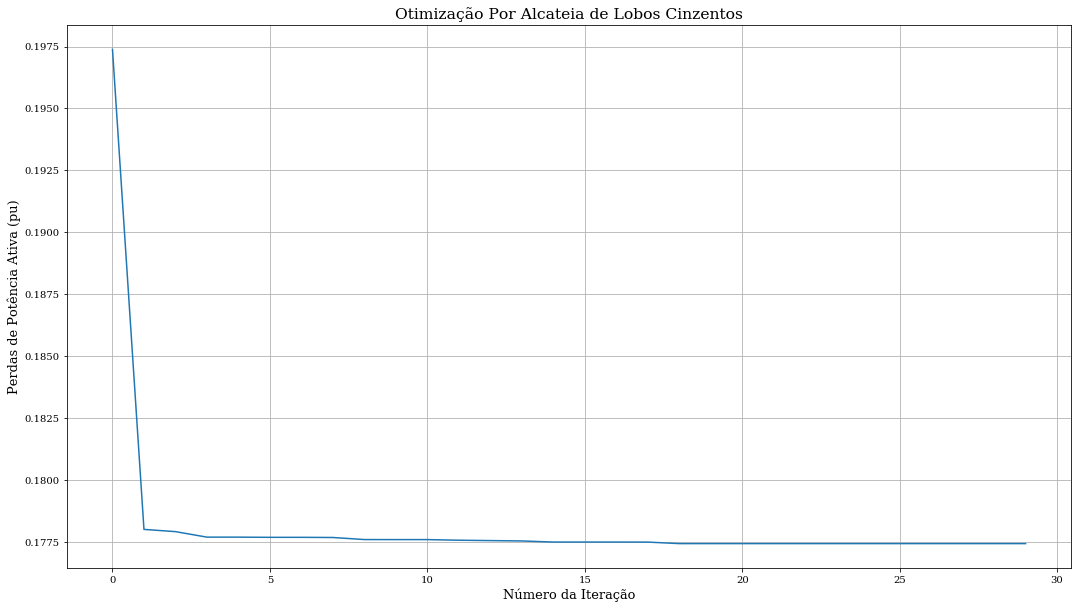

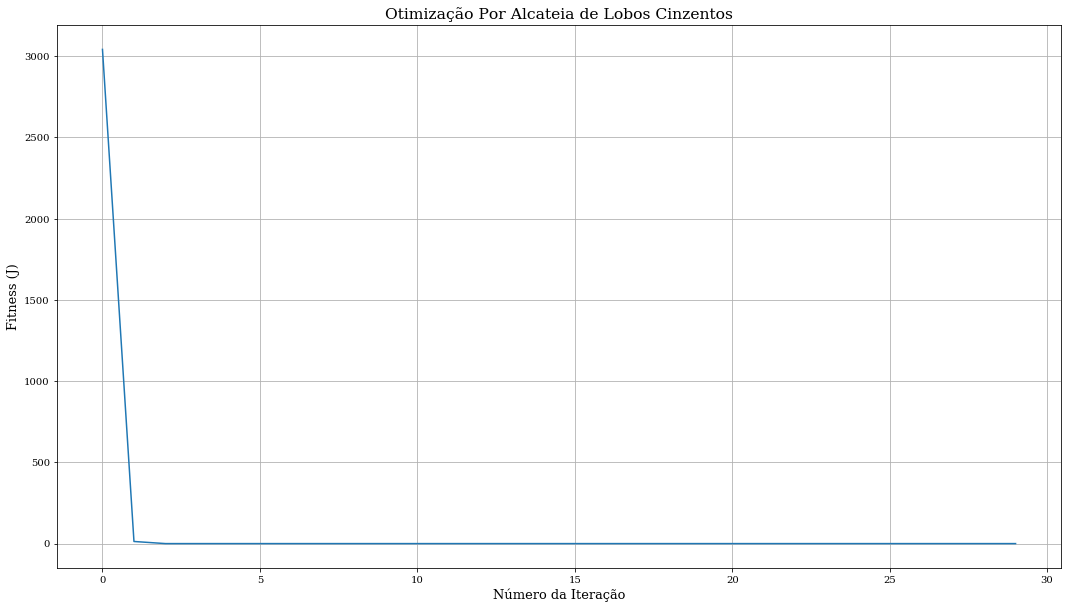

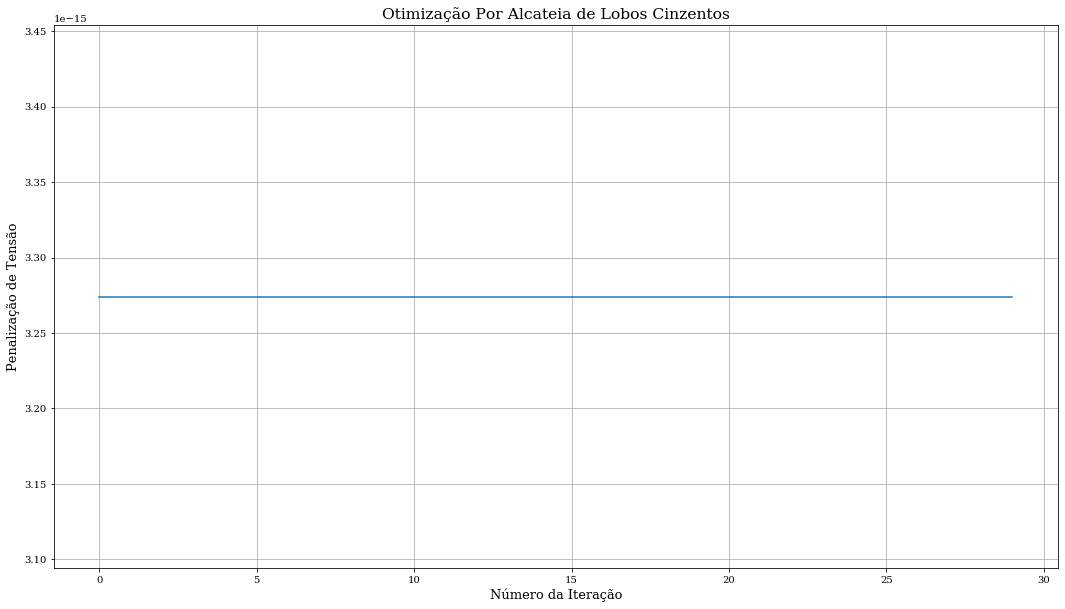

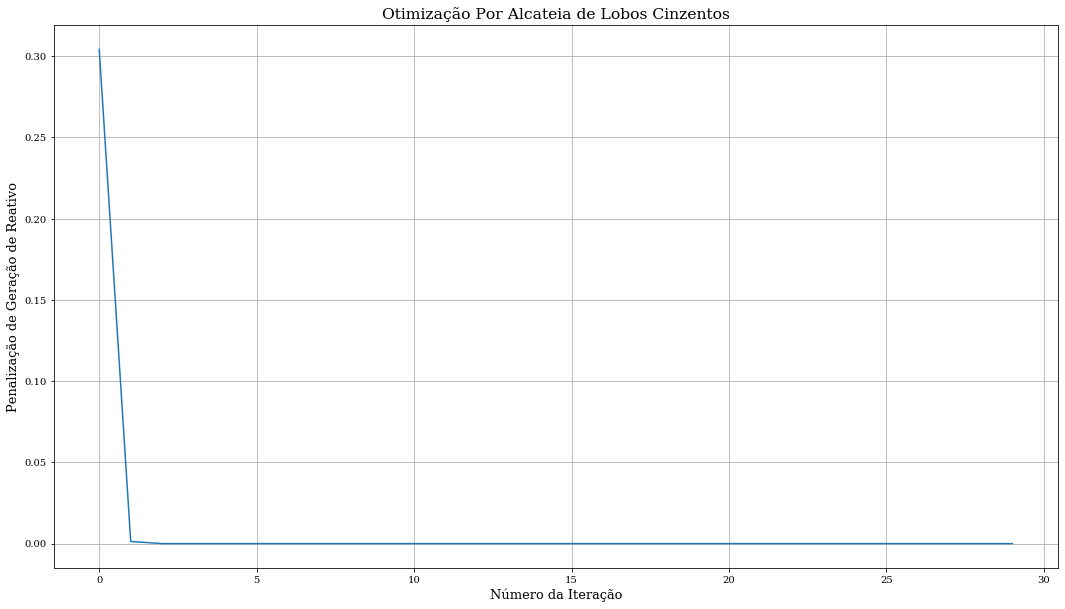

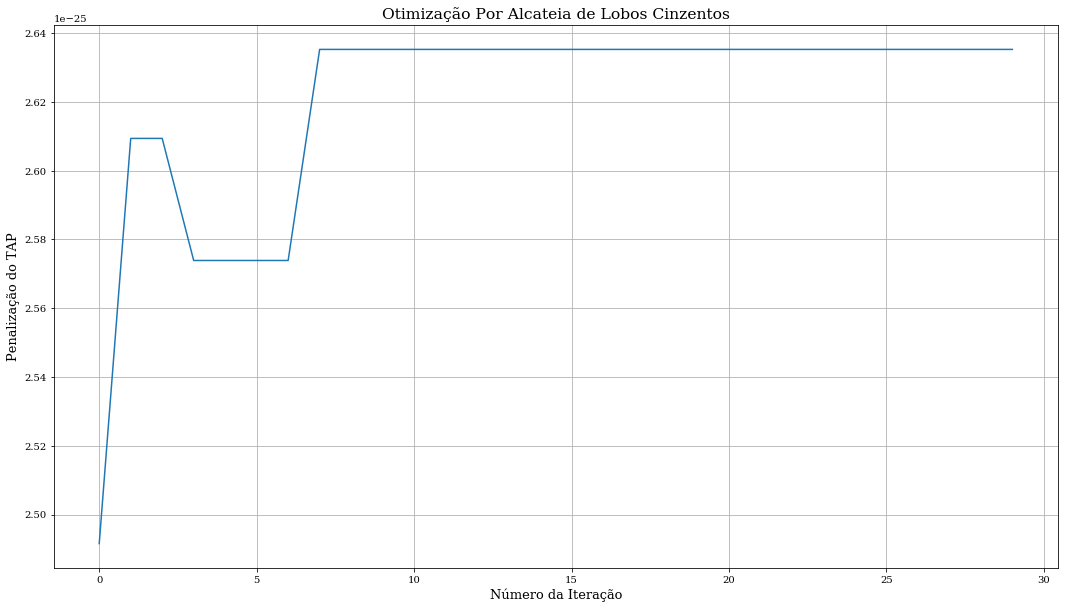

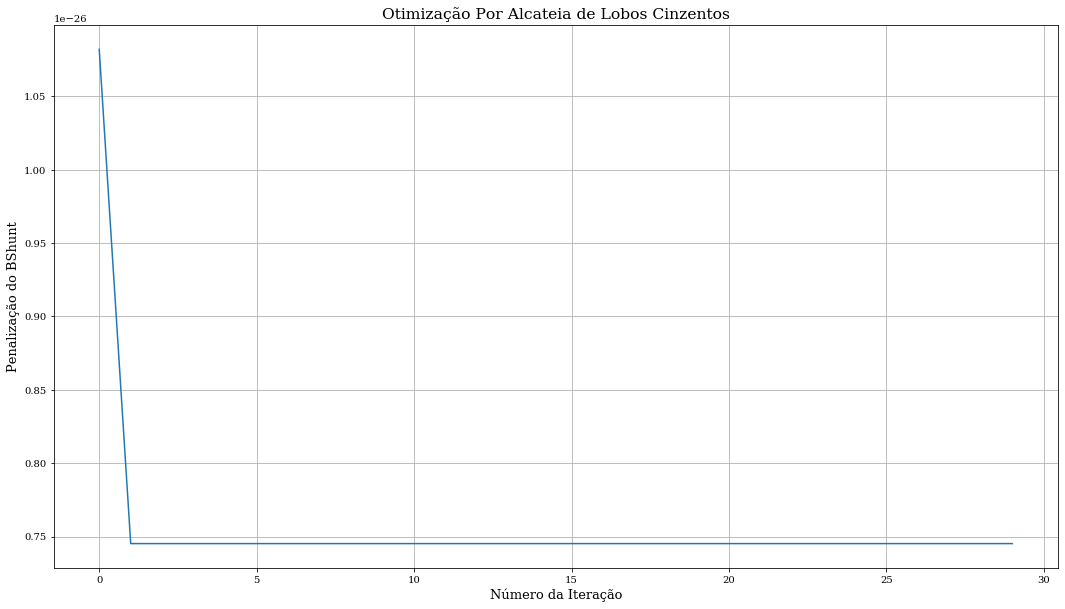

In [156]:
penalizacao_v = 10000
penalizacao_q = 10000
penalizacao_tap = 0
penalizacao_bshunt = 0

max_iter = 30

n_wolfs = 20

sistema = sep30

if len(sistema.bus) == 14:

    v_inicial = inicial_14

if len(sistema.bus) == 30:

    v_inicial = inicial_30
    

if len(sistema.bus) == 118:

    v_inicial = inicial_118


if len(sistema.bus) == 300:

    v_inicial = inicial_300


j,perdas,pen_v,pen_gq,pen_tap,pen_bsh,alcateias,lobo_alfa, lobo_beta, lobo_delta, elapsed = otimizacao_alcateia_de_lobos_cinzentos2(sistema, penalizacao_v, penalizacao_q, penalizacao_tap, penalizacao_bshunt, max_iter, n_wolfs, valor_inicial=v_inicial,relatorio=True,inicial=True)



In [ ]:
sep14.gen

In [ ]:
sep14.res_gen

In [ ]:
sep14.ext_grid

In [ ]:
cria_alcateia(sep118,1)

In [ ]:
sep118.ext_grid

In [ ]:
sep118.res_ext_grid

In [ ]:
sep14.poly_cost

In [ ]:
sep30.poly_cost

In [ ]:
np.min(jota[:,-1])

In [ ]:
global_b[49]

In [ ]:
np.mean(tim)

In [ ]:
pena = jota[:,-1] - per[:,-1]

In [ ]:
len(pena[pena<0.0001])

In [ ]:
sep14.res_ext_grid

In [ ]:
sep118.ext_grid

In [ ]:
sep118.gen

In [ ]:
sep14.trafo

In [ ]:
sep5.line

In [ ]:
sep5.gen

In [ ]:
pp.runpp(sep4, algorithm = 'nr')

In [ ]:
sep4.line

In [ ]:
sep4.res_ext_grid

In [ ]:
sep4.ext_grid

In [ ]:
sep4.load

In [ ]:
sep30.ext_grid

In [ ]:
sep30.gen

In [167]:
lobo_alfa

array([9.91391785e-01, 1.02488343e+00, 1.01120128e+00, 9.97303585e-01,
       9.55203072e-01, 1.01649448e+00, 9.80723656e-01, 9.73632354e-01,
       9.72231795e-01, 9.65543837e-01, 1.01954070e+00, 9.97243699e-01,
       1.00519768e+00, 1.03463604e+00, 9.97207873e-01, 9.99794872e-01,
       9.95981189e-01, 9.69049037e-01, 9.73051861e-01, 9.90534283e-01,
       9.89999163e-01, 9.93628658e-01, 9.86896501e-01, 9.88967387e-01,
       1.00923637e+00, 9.92006905e-01, 9.93160235e-01, 9.95649197e-01,
       1.01571693e+00, 1.02098430e+00, 1.03968836e+00, 1.02894927e+00,
       9.95613601e-01, 9.66920711e-01, 9.93981443e-01, 9.97466176e-01,
       9.72165845e-01, 9.78119270e-01, 9.96361732e-01, 1.01555579e+00,
       1.01937044e+00, 9.83139410e-01, 9.77123626e-01, 9.75687140e-01,
       9.79786148e-01, 9.80135969e-01, 9.85655220e-01, 1.02773410e+00,
       9.95928233e-01, 9.83038586e-01, 1.02032653e+00, 9.79651156e-01,
       1.00500359e+00, 1.00000000e+00, 1.00625000e+00, 9.56250000e-01,
      